<a href="https://colab.research.google.com/github/BernnardoSBO/tp1-alg2/blob/main/Algoritmos_2_TP1_Entregavel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ALGORITMOS II - TRABALHO PRÁTICO 1
Bernnardo Seraphim Baptista de Oliveira - 2019006477

Michel Barros da Fonseca - 2020006906

##0) Introdução

O trabalho prático consiste em aplicar o conhecimento obtido durante as aulas de Algoritmos II.
Esse trabalho cobre os seguintes pontos:
  - 1 - Implementação do algoritmo da envoltória convexa
  - 2 - Implementação do algoritmo de varredura linear e verificação de separabilidade
  - 3 - Definição da reta modelo dos dados
  - 4 - Construção do Modelo

Para navegar facilmente, basta usar o Índice do Google Colab.

###0.1) Importação

Essas são as bibliotecas usadas no desenvolvimento do trabalho

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pylab as pl
from matplotlib import collections as mc
from typing import Union, Tuple
import pandas as pd
from collections import deque
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

### 0.2) Configuração de Bibliotecas

Caso desejar, você pode mudar a proporção das figuras abaixo.

In [ ]:
#plt.rcParams['figure.figsize'] = (20, 13)
plt.rcParams['figure.figsize'] = (15, 15)

## 1) Implementação de algoritmo de envoltória convexa
Foi optado o algoritmo de envoltória de Graham, visto que sua complexidade é de $O(n\log n)$. O uso do algoritmo Marcha de Jarvis foi descartado uma vez que esse algoritmo tem uma complexidade que depende da quantidade de vértices que estão na envoltória, sendo a sua complexidade $O(nh)$. Assim, quanto mais nós estiverem na envoltória, mais o algoritmo se aproxima da complexidade $O(n^2)$. 

Visto que não sabemos previamente a natureza dos dados que serão utilizados, assim foi feita a escolha de usar o Algoritmo de Graham.

###1.1) Definição de funções auxiliares

É necessário a criação de novas funções e estruturas de dados para auxiliar na implementação do algoritmo e na leitura posterior.

####Função para ângulo formado o vértice base:

A função `slope` retorna o declive entre os pontos `p1` e `p2`. Essa função é usada para computar o primeiro passo do algoritmo de Graham, que é a ordenação dos pontos pelo ângulo em relação ao ponto base.

In [ ]:
def slope (p1, p2):
  if p1[0] == p2[0]:
    return float('inf')
  else:
    return (p1[1] - p2[1]) / (p1[0] - p2[0])

####Função para produto vetorial entre dois segmentos que compartilham um vértice

A função `cross_product` é usada para calcular se uma reta rotaciona em sentido horário ou anti-horário em relação à outra.

In [ ]:
def crossProduct(p0, p1, p2):
  edge1 = (p1[0] - p0[0], p1[1] - p0[1])
  edge2 = (p2[0] - p0[0], p2[1] - p0[1])

  crossP = edge1[0] * edge2[1] - edge1[1] * edge2[0]
  return crossP

####Função para gerar amostras em uma distribuição que remeta a um círculo

Essas funções foram feitas para fins de teste e exibição visual do algoritmo.

In [ ]:
def generatePoint(Radius, Center):
  r = Radius * math.sqrt(np.random.random())
  thetha = np.random.random() * 2 * 3.1419

  x = round(Center[0] + r*math.cos(thetha), 2)
  y = round(Center[1] + r*math.sin(thetha), 2)

  return (x,y)

def generateListOfPoints(Radius, Center, Amount):
  return [(generatePoint(Radius, Center)) for i in range(Amount)]

###1.2) Implementação do algoritmo de Graham

In [ ]:
def grahamAlg(points):
  """Implementação do algoritmo de Graham.
  
     Definimos uma ordenação baseada primeiramente no valor da coordenada x
     a fim de adaptar o algoritmo para o uso da função slope.
     Após isso, o ponto inicial é definido da seguinte forma:
      - o ponto inicial é o ponto com o menor y.
      - caso haja empate na condição acima, o ponto é aquele com menor valor x.
    
     Agora, ordenamos os pontos com a seguinte hierarquia:
     I)   O ângulo formado entre o ponto inicial e o ponto analisado, caso empate
     II)  Pontos com maior y primeiro, caso empate
     III) Pontos com menor x primeiro.

     O caso II) se justifica pois, ao termos uma mesma inclinação, ambos os pontos
     estarão em uma mesma reta formada com o ponto inicial. Logo, visto que o 
     funcionamento do algoritmo prevê que devemos escolher aquele ponto mais distante
     do ponto inicial nesses casos, ordenamos dessa maneira pois do jeito que o
     algoritmo foi implementado, tomaremos como parte da envoltória o ponto que vem
     depois na lista de pontos.

  Args:
      points (list): a lista com os pontos a serem computados

  Returns:
      list: a lista com os pontos que formam a envoltória
  """
  points = list(set(points)) #removendo pontos duplicados

  pts = points.copy()

  #Definimos uma ordenação baseada primeiramente valor da coordenada x
  #a fim de adaptar o algoritmo para o uso da função slope 
  pts.sort(key=lambda x: [x[0], x[1]])

  #Definimos o ponto inicial aquele com menor valor de x
  startingPoint = pts.pop(0)

  #Agora, ordenamos os pontos com a seguinte hierarquia:
  # I)   O ângulo formado entre o ponto inicial e o ponto analisado, caso empate
  # II)  Pontos com maior y primeiro, caso empate
  # III) Pontos com menor x primeiro.

  # O caso II) se justifica pois, ao termos uma mesma inclinação, ambos os pontos
  # estarão em uma mesma reta formada com o ponto inicial. Logo, visto que o 
  # funcionamento do algoritmo prevê que devemos escolher aquele ponto mais distante
  # do ponto inicial nesses casos, ordenamos dessa maneira pois do jeito que o
  # algoritmo foi implementado, tomaremos como parte da envoltória o ponto que vem
  # depois na lista de pontos.
  pts.sort(key=(lambda x: (slope(x, startingPoint), -x[1], x[0])))

  hull = [startingPoint]

  hull.append(pts.pop(0))
  hull.append(pts.pop(0))

  for i in range(len(pts)):
    while len(hull) > 2 and crossProduct(hull[-2], hull[-1], pts[i]) < 0:
      hull.pop(-1)
    hull.append(pts[i])

  hull.append(startingPoint)

  return hull

###1.3) Função para a criação do gráfico

In [ ]:
def plotHull(hull, points):
  """Função que cria um gráfico para a exibição de uma envoltória

  Args:
      hull (list): pontos da envoltória
      points (list): todos os pontos para o gráfico
  """
  xL, yL = zip(*hull)

  maxXTick = round(max(xL),1) 
  minXTick = round(min(xL),1)
  stepX = round((maxXTick - minXTick)/20,1)
  maxXTick = maxXTick + stepX
  minXTick = minXTick - stepX

  maxYTick = round(max(yL),1)
  minYTick = round(min(yL),1)
  stepY = round((maxYTick - minYTick)/20,1)
  if stepY == 0:
    stepY = 1
  maxYTick = maxYTick + stepY
  minYTick = minYTick - stepY

  plt.xticks(np.arange(minXTick, maxXTick, stepX))
  plt.yticks(np.arange(minYTick, maxYTick, stepY))
  plt.grid(True)

  plt.plot(xL,yL)
  plt.scatter([a[0] for a in points], [a[1] for a in points])
  for i, j in zip(xL,yL):
    plt.text(i, j+stepY/2, '(\u2245{}, \u2245{})'.format(round(i,2),round(j,2)))
  plt.show()

def plotBothHulls(hullA, pointsA, hullB, pointsB):
  """Função que cria um gráfico para a exibição de duas envoltórias

  Args:
      hullA (list): pontos da envoltória A
      pointsA (list): pontos internos e da envoltória de A
      hullB (list): pontos da envoltória B
      pointsB (list): pontos internos e da envoltória de B
  """
  axL, ayL = zip(*hullA)
  bxL, byL = zip(*hullB)

  maxXTick = round(max(max(axL), max(bxL)),1)
  minXTick = round(min(min(axL), min(bxL)),1)
  stepX = round((maxXTick - minXTick)/20,1)
  maxXTick = maxXTick + stepX
  minXTick = minXTick - stepX

  maxYTick = round(max(max(ayL), max(byL)),1)
  minYTick = round(min(min(ayL), min(byL)), 1)
  stepY = round((maxYTick - minYTick)/20,1)
  if stepY == 0:
    stepY = 1
  maxYTick = maxYTick + stepY
  minYTick = minYTick - stepY

  step = round((stepX + stepY)/2,1)

  maxTick = max(maxYTick, maxXTick)
  minTick = min(minYTick, minXTick)

  plt.xticks(np.arange(minTick, maxTick, step))
  plt.yticks(np.arange(minTick, maxTick, step))
  plt.grid(True)


  plt.xlim(minTick, maxTick)
  plt.ylim(minTick, maxTick)

  plt.plot(axL,ayL)
  plt.scatter([i[0] for i in pointsA], [i[1] for i in pointsA])
  for i, j in zip(axL,ayL):
    plt.text(i, j+stepY/2, '(\u2245{}, \u2245{})'.format(round(i,2),round(j,2)))

  plt.plot(bxL,byL)
  plt.scatter([i[0] for i in pointsB], [i[1] for i in pointsB])
  for i, j in zip(bxL,byL):
    plt.text(i, j+stepY/2, '(\u2245{}, \u2245{})'.format(round(i,2),round(j,2)))

  plt.show()

###1.4) Teste do Algoritmo

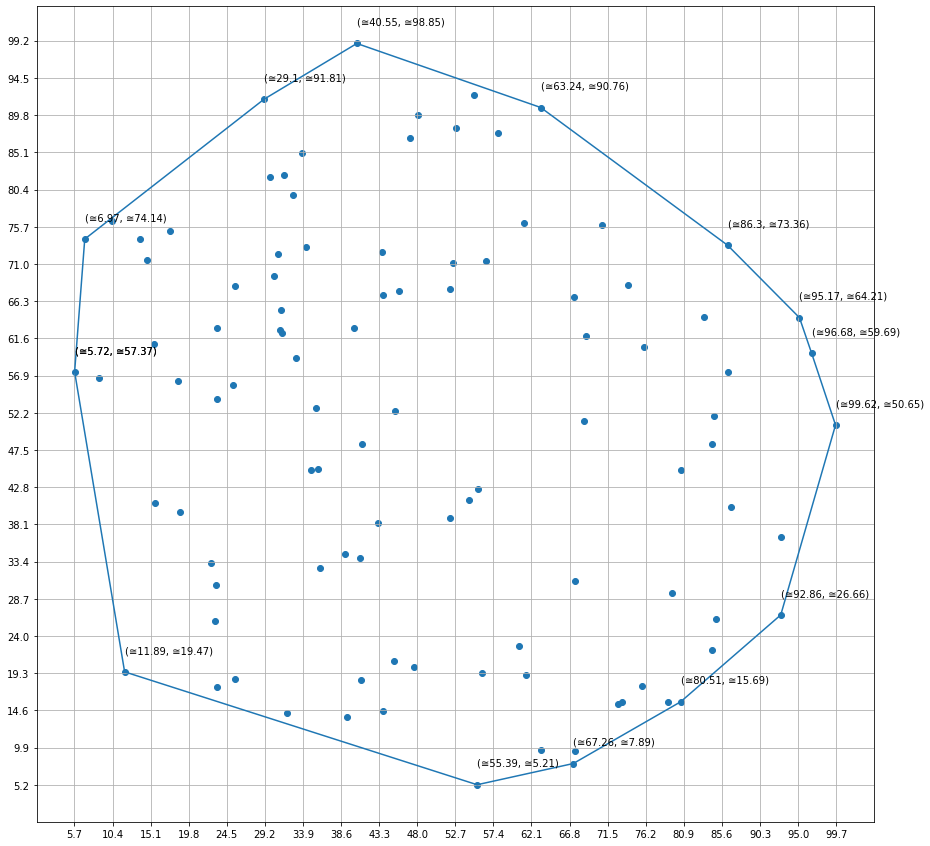

In [ ]:
listOfPoints = generateListOfPoints(50, (50,50), 100)

hull = grahamAlg(listOfPoints)

plotHull(hull, listOfPoints)

##2) Implementção do Algoritmo de Varredura Linear

O algoritmo de varredura linear recebe um conjunto de retas, e verifica se há alguma interseção dentre as retas do conjunto. Usando uma árvore binária balanceada como estrutura de dados base, esse algoritmo possui complexidade de $O(n\ logn)$ sendo $n$ o número de arestas.

###2.1) Definição de funções e estruturas de dados auxiliares

Devido à complexidade de uma implementação eficiente da varredura linear, são necessárias várias estruturas de dados especiais para representar tais objetos de maneira mais compreensível e simples.

####Classe para ponto

In [ ]:
class Point:
    """Classe responsável por representar um Ponto em um plano R²."""
    def __init__(self, x, y=None):
        """Cria um objeto Point. Pode receber dois tipos diferentes de chamada:
            - recebe uma tupla (x, y)
            - recebe x e y como argumentos separados

        Args:
            x (Union[tuple, float]): O x do ponto. Pode ser uma tupla que representa (x, y) do ponto.
            y (float, optional): O y do ponto. Só deve ser passado caso x for um float. Defaults to None.
        """
        self.epsilon = 0.005
        if y is not None:
            self.x = x
            self.y = y
        else:
            self.x = x[0]
            self.y = x[1]
        self.isLineStart = False
        self.linkedSegment = None

    def __lt__(self, other):
        """Implementa o operador < para a classe Point.
           A ordem dos pontos é definida pelo algoritmo de varredura linear:
            - ordena por x
            - em caso de empate, self é menor se é ponto inicial e other é ponto final
            - em caso de empate, ordena de maneira crescente por y

        Args:
            other (Point): o ponto a ser comparado

        Returns:
            bool: True se self < other, caso contrário False
        """
        if self.x < other.x:
            return True
        elif self.x > other.x:
            return False

        else:
            if self.isLineStart and not other.isLineStart:
                return True
            elif not self.isLineStart and other.isLineStart:
                return False
            elif self.y < other.y:
                return True
            else:
                if self.y > other.y:
                    return False
                elif self.isLineStart and other.isLineStart:
                    return self.linkedSegment.rhs < other.linkedSegment.rhs
                else:
                    return False

    def __eq__(self, other):
        """Implementa o operador = para a classe Point

        Args:
            other (Point): o ponto a ser comparado

        Returns:
            bool: True se todos os atributos de self forem iguais aos de other, False caso contrário
        """
        if (
            self.x == other.x
            and self.y == other.y
            and self.isLineStart == other.isLineStart
            and self.linkedSegment == other.linkedSegment
        ):
            return True
        else:
            return False

    def __le__(self, other):
        """Implementa o operador <= para a classe Point

        Args:
            other (Point): o ponto a ser comparado

        Returns:
            bool: resultado de __lt__ or __eq__
        """
        if self.__lt__(other) or self.__eq__(other):
            return True
        else:
            return False

    def __str__(self):
        return f"({self.x}, {self.y})"

    def __repr__(self):
        return f"({self.x}, {self.y})"

    def disturb(self):
        """Função responsável por adicionar um pequeno erro a x, para evitar casos especiais."""
        self.x -= self.epsilon

####Classe para equação de reta

In [ ]:
class LineEquation:
    """Classe reponsável por representar uma equação de reta."""
    def __init__(self, eixo: str, coef_angular: float, coef_linear: float) -> None:
        self.eixo = eixo
        self.coef_angular = coef_angular
        self.coef_linear = coef_linear

    def __repr__(self) -> str:
        if self.coef_angular != 0:
            if self.coef_linear < 0:
                return f"{self.eixo}={self.coef_angular}x{self.coef_linear}"
            return f"{self.eixo}={self.coef_angular}x+{self.coef_linear}"
        else:
            return f"{self.eixo}={self.coef_linear}"

    def determine_point_location(self, p: Point) -> bool:
        """Determina se o ponto está acima ou abaixo da reta.

        Arguments:
          p: Point a ser comparado.

        Returns:
          bool: True se acima da reta, False caso contrário.
        """
        if self.coef_angular == 0:
            if self.eixo == "y":
                return p.y > self.coef_linear
            else:
                return p.x > self.coef_linear
        else:
            y_in_line = (p.x * self.coef_angular) + self.coef_linear
            return p.y > y_in_line

####Classe para linha

In [ ]:
class Line:
    """Classe responsável por representar uma aresta no plano R²."""
    def __init__(self, p1: Point, p2: Point, Class: bool):
        sortedPoints = sorted([p1, p2])
        # classe é um atributo auxiliar para determinar a envoltória cuja aresta faz parte.
        self.Class = Class

        # caso ambos os pontos que definem a reta possuem
        # o mesmo x, desviamos o primeiro para a esquerda
        # por um valor de epsilon
        if sortedPoints[0].x == sortedPoints[1].x:
            sortedPoints[0].disturb()

        self.lhs = sortedPoints[0]
        self.lhs.isLineStart = True
        self.lhs.linkedSegment = self

        self.rhs = sortedPoints[1]
        self.rhs.linkedSegment = self

    def get_y(self, x):
        """Retorna o valor de y no ponto x da reta relacionada à aresta.

        Args:
            x (float): o valor de x a ser baseado

        Returns:
            float: o valor de y
        """
        if abs(self.lhs.x - self.rhs.x) <= 0:
            return self.lhs.y

        mySlope = (self.rhs.y - self.lhs.y)/(self.rhs.x - self.lhs.x)
        y = mySlope*(x - self.lhs.x) + self.lhs.y

        return y

    def __lt__(self, other):
        """Implementa o operador < para a classe Line.
           Pega o maior x dentre os menores x dos segmentos,
           ou seja, pega o maior ponto de inicio de segmento,
           calcula a projeção desse x na outra reta para
           determinar se a reta está acima ou abaixo.

        Args:
            other (Line): a aresta a ser comparada

        Returns:
            bool: True se a reta está abaixo de other, False caso contrário.
        """
        x = max(min(self.lhs.x, self.rhs.x), min(other.lhs.x, other.rhs.x))

        selfY = self.get_y(x)
        otherY = other.get_y(x)

        if selfY != otherY:
          return selfY < otherY

        #if both y's are the same, then both lines share the lhs. To find which one is below, we can do a crossProduct between the lines
        else:
          val = crossProduct((self.lhs.x, self.lhs.y), (other.rhs.x, other.rhs.y), (self.rhs.x, self.rhs.y))
          if val > 0:
            return False
          if val < 0:
            return True
          else:
            return False

        #x = self.lhs.x
        #otherSlope = (other.rhs.y - other.lhs.y)/(other.rhs.x - other.lhs.x)
        #getOtherY = otherSlope*(x - other.lhs.x) + other.lhs.y

    def __le__(self, other):
        if self.lhs <= other.lhs:
            return True
        else:
            return False

    def __repr__(self):
        return f"Line( Class: {1 if not self.Class else 2} | LHS: {self.lhs} | RHS: {self.rhs})"

####Árvore Rubro-negra

Essa estrutura é necessária para a ordenação das arestas na árvore de maneira eficiente. Não entraremos em detalhes de como funciona, mas basicamente:
 - É uma árvore com operações de inserção, remoção e busca com complexidade $O(log n)$
 - Reordena automaticamente os nós na inserção e remoção

In [ ]:
class RBNode:
    def __init__(self, key=None):
        # Color of node:
        # True  -> Red
        # False -> Black
        self.color = True
        # Value stored in Node
        self.key = key
        # Left child
        self.leftChild = None
        # Right child
        self.rightChild = None
        # Parent node
        self.parent = None

    # Setters
    # Color
    def setColorRed(self):
        self.color = True

    def setColorBlack(self):
        self.color = False

    # Children
    def setLeftChild(self, lchild):
        self.leftChild = lchild

    def setRightChild(self, rchild):
        self.rightChild = rchild

    # Key
    def setKey(self, key):
        self.key = key

    # Getters
    # Color
    def isRed(self):
        return self.color

    def isBlack(self):
        return not self.color

    def getColor(self):
        return "Red" if self.color else "Black"

    # Children
    def getLeftChild(self, lchild):
        return self.leftChild

    def getRightChild(self, rchild):
        return self.rightChild

    # Key
    def getKey(self):
        return self.key

In [ ]:
class RBTree:
    def __init__(self):
        self.nil = RBNode()
        self.nil.setColorBlack()
        self.nil.setLeftChild(None)
        self.nil.setRightChild(None)
        self.root = self.nil

    def rotateLeft(self, oldParent):
        #     ___
        #    /   oldParent                                   newParent
        #   V   /         \                                 /         \
        #      a         newParent         ->          oldParent       c
        #               /         \                    /       \
        #              b           c                  a         b
        #
        # novo pai é o filho direito
        newParent = oldParent.rightChild

        # o filho direito do pai antigo deixa de ser o pai novo e agora são os filhos esquerdos do pai novo
        oldParent.rightChild = newParent.leftChild

        # caso o novo filho direito do pai antigo seja diferente de nulo
        # definimos que o pai desse filho é o pai antigo
        if newParent.leftChild != self.nil:
            newParent.leftChild.parent = oldParent

        # o pai do novo pai passa a ser o seu avô
        newParent.parent = oldParent.parent

        # se o avô atribuido ao novo pai como pai seja nulo
        # quer dizer que esse novo pai é a raiz
        if oldParent.parent == self.nil:
            self.root = newParent

        # caso não seja nulo, definimos que o novo pai é o filho direito ou
        # esquerdo do avô
        elif oldParent == oldParent.parent.leftChild:
            oldParent.parent.leftChild = newParent
        else:
            oldParent.parent.rightChild = newParent

        # por último, definimos a relação entre o pai novo e o pai antigo
        newParent.leftChild = oldParent
        oldParent.parent = newParent

    def rotateRight(self, oldParent):
        #                                                           ___
        #       oldParent                                   newParent  \
        #      /         \                                 /         \  V
        #     a         newParent         <-          oldParent       c
        #              /         \                    /       \
        #             b           c                  a         b
        #
        newParent = oldParent.leftChild
        oldParent.leftChild = newParent.rightChild

        if newParent.rightChild != self.nil:
            newParent.rightChild.parent = oldParent

        newParent.parent = oldParent.parent

        if oldParent.parent == self.nil:
            self.root = newParent
        elif oldParent == oldParent.parent.leftChild:
            oldParent.parent.leftChild = newParent
        else:
            oldParent.parent.rightChild = newParent

        newParent.rightChild = oldParent
        oldParent.parent = newParent

    def insert(self, z):
        newNode = RBNode(z)
        newNode.leftChild = self.nil
        newNode.rightChild = self.nil

        # y will act like a temporary parent, anchoring the variable x that will climb up the tree
        y = self.nil

        # x will be the node that climbs up the tree being compared, so it will act as a child of node y
        x = self.root

        # while we haven't hit the top of the tree
        while x != self.nil:
            # y acting as an aux variable, getting the position of parent every iteration
            y = x

            # determining which direction we'll climb up the tree, which child x is going to be
            # climb through left, x now is left child
            if newNode.getKey() < x.getKey():
                x = x.leftChild
            # climb through right, x now is right child
            else:
                x = x.rightChild

        # now that we've already hit a leaf with x, define y as a parent for the newNode
        newNode.parent = y

        # corner case-> if the tree is empty
        if y == self.nil:
            self.root = newNode

        # if newNode(z) is lower than y, then it is a left child
        elif newNode.key < y.key:
            y.leftChild = newNode
        # otherwise newNode is the right child
        else:
            y.rightChild = newNode
        newNode.leftChild = self.nil
        newNode.rightChild = self.nil
        newNode.setColorRed()
        # -> since we've inserted a red node, we should check whether this new configuration conflicts with the rbtree rules
        self.fixInsert(newNode)

    def search(self, z):
        try:
            x = self.root

            if x == self.nil:
                raise Exception("RBTree is empty")

            #        while x != self.nil and z != x.key:
            #          if x.key <= z:
            #            x = x.rightChild
            #          else:
            #            x = x.leftChild

            while x != self.nil and z != x.key:
                #print("Comparação:")
                #print("Nó   buscado: ", z)
                #print("Nó comparado: ", x.key)
                #if x.key > z:
                #    x = x.leftChild
                #    print("Filho esquerdo escolhido")
                #else:
                #    x = x.rightChild
                #    print("Filho direito escolhido")

                if z < x.key:
                  x = x.leftChild
                  #print("Filho esquerdo escolhido")
                else:
                  x = x.rightChild
                  #print("Filho direito escolhido")

            if x == self.nil:
                raise Exception("Node doesn't exist in RBTree")

            return x

        except Exception as error:
            #print(error)
            pass

    def fixInsert(self, z):
        # when inserting a new node, sometimes a conflict with the rbtree
        # rules may arise
        # Rules:
        # 1 -> every node is either red or black
        # 2 -> the root is black
        # 3 -> every leaf(nil) is black
        # 4 -> if a node is red, the both its children are black
        # 5 -> for each node, all simple paths from the node to descendant leaves
        #      contain the same number of black nodes
        #
        # in case of insertion, we can actually run into 2 property violations:
        #       2nd rule violation: the root is red
        #           considering that the tree already complied with the rules before the insert,
        #           this case only happens when the newly added node turns out to be the root
        #       4th rule violation: a red node has a red child
        #           considering that the tree already complied with the rules before the insert,
        #           this can only happen when both newNode and newNode.parent are red, since
        #           the tree already met with the rules before and newNode children are black by
        #           definition (they are self.nil)
        while z.parent.isRed():
            # if the parent node its the leftChild of the grandParent
            if z.parent == z.parent.parent.leftChild:
                # define y as z uncle
                zUncle = z.parent.parent.rightChild
                # if uncle is red just as z, we enter in case 1
                if zUncle.isRed():
                    z.parent.setColorBlack()
                    zUncle.setColorBlack()
                    z.parent.parent.setColorRed()
                    z = z.parent.parent
                else:
                    if z == z.parent.rightChild:
                        z = z.parent
                        self.rotateLeft(z)
                    z.parent.setColorBlack()
                    z.parent.parent.setColorRed()
                    self.rotateRight(z.parent.parent)
            else:
                # define y as z uncle
                zUncle = z.parent.parent.leftChild
                # if uncle is red just as z, we enter in case 1
                if zUncle.isRed():
                    z.parent.setColorBlack()
                    zUncle.setColorBlack()
                    z.parent.parent.setColorRed()
                    z = z.parent.parent
                else:
                    if z == z.parent.leftChild:
                        z = z.parent
                        self.rotateRight(z)
                    z.parent.setColorBlack()
                    z.parent.parent.setColorRed()
                    self.rotateLeft(z.parent.parent)
        self.root.setColorBlack()

    def exclude(self, z):
        # buscar nó a ser excluído
        zeta = self.search(z)
        #print('nó a ser excluido ', zeta)

        y = zeta
        yColor = y.color

        # caso nó a esquerda seja o nil, apenas subimos o nó
        # a direita para a posição de nó a ser excluido
        #    o                      o
        #  /   \                   / \
        #       z           ->        rest
        #     /   \
        #   nil    rest
        # 1° Caso) filho esquerdo é nil
        if zeta.leftChild == self.nil:
            x = zeta.rightChild
            self.transplant(zeta, x)

            # o mesmo se aplica se nó direito for nil e esquerdo não for
            # 2° Caso) filho direito é nil e esquerdo não é
        elif zeta.rightChild == self.nil:
            x = zeta.leftChild
            self.transplant(zeta, x)
            # 3° Caso) Nenhum filho é nil
            #   no 3° caso, temos que verificar duas possibilidads
            #       a) nó filho direito é o menor valor
            #       b) nó filho direito não é o menor valor
        else:
            # achar o minimo na subarvore direita
            y = self.treeMinimum(zeta.rightChild)

            # definimos novamente a cor original do y a ser colocado na posição do excluido
            yColor = y.color

            # usamos x para trocar de posição com y
            x = y.rightChild

            if y.parent == zeta:
                x.parent = y
            else:

                # x vai para o lugar do nó que vai ser trocado
                # note que não precisamos nos preocupar com o filho esquerdo de y pois y já é o nó mais a esquerda da subarvore
                self.transplant(y, x)

                # definimos que o filho direito do excluido agora é filho de y
                y.rightChild = zeta.rightChild
                y.rightChild.parent = y

            # esse transplant vai apenas setar o pai do excluido como agora pai de y
            self.transplant(zeta, y)

            # definimos agora a relação com o filho esquerdo de z para o y
            y.leftChild = zeta.leftChild
            y.leftChild.parent = y

            # substituimos a cor para a cor que estava em z antes, assim não geramos conflito
            y.color = zeta.color

        if yColor == False:
            self.fixDelete(x)

    def treeMinimum(self, z):
        x = z
        while x.leftChild != self.nil:
            x = x.leftChild
        return x

    def treeMaximum(self, z):
        x = z
        while x.rightChild != self.nil:

            x = x.rightChild
        return x

    def below(self, z):
        x = self.search(z)

        if x.leftChild != self.nil:
            return self.treeMaximum(x.leftChild)

        y = x.parent

        while y != self.nil and x == y.leftChild:
            x = y
            y = x.parent

        return y

    def above(self, z):
        x = self.search(z)
        if x.rightChild != self.nil:
            return self.treeMinimum(x.rightChild)

        y = x.parent

        while y != self.nil and x == y.rightChild:
            x = y
            y = x.parent

        return y

    def transplant(self, u, v):
        # essa função lida apenas com a relação entre o nó
        # a ser transplantado e o nó pai do que está sendo
        # excluido

        # se o nó pai do nó a ser excluído é o nil, significa
        # que o nó a ser excluido é a raiz, logo definimos
        # que o nó a ser transplantado ocupara a raiz da RBTree
        if u.parent == self.nil:
            self.root = v

        # no else e no elif definimos em qual posição o nó
        # a ser transplantado vai ocupar em relaçao ao pai
        # ou seja, filho esquerdo ou direito
        elif u == u.parent.leftChild:
            u.parent.leftChild = v
        else:
            u.parent.rightChild = v

        # por ultimo alteramos o pai do nó transplantado para
        # o pai definido para u
        v.parent = u.parent

    def fixDelete(self, x):
        while x != self.root and x.color == False:
            if x == x.parent.leftChild:
                w = x.parent.rightChild

                if w.color == True:
                    w.color == False
                    x.parent.color = True
                    self.rotateLeft(x.parent)
                    w = x.parent.rightChild

                if w.leftChild.color == False and w.rightChild.color == False:
                    w.color = True
                    x = x.parent

                else:
                    if w.rightChild.color == False:
                        w.leftChild.color = False
                        w.color = True
                        self.rotateRight(w)
                        w = x.parent.rightChild

                    w.color = x.parent.color
                    x.parent.color = False
                    w.rightChild.color = False
                    self.rotateLeft(x.parent)
                    x = self.root
            else:
                w = x.parent.leftChild

                if w.color == True:
                    w.color = False
                    x.parent.color = True
                    self.rotateRight(x.parent)
                    w = x.parent.leftChild

                if w.rightChild.color == False and w.leftChild.color == False:
                    w.color = True
                    x = x.parent

                else:
                    if w.leftChild.color == False:
                        w.rightChild.color = False
                        w.color = True
                        self.rotateLeft(w)
                        w = x.parent.leftChild

                    w.color = x.parent.color
                    x.parent.color = False
                    w.leftChild.color = False
                    self.rotateRight(x.parent)
                    x = self.root

        x.color = False

####Função para pegar eventos para o algoritmo rodar

In [ ]:
def getEvents(lines):
    """Pega os extremos de todas as arestas e os retorna em ordem.

    Args:
        lines (List[Line]): lista de linhas a serem verificadas

    Returns:
        list: lista com os pontos
    """
    events = []
    for line in lines:
        events.append(line.lhs)
        events.append(line.rhs)
    # sort events based on their x
    events.sort(key=lambda x: (x.x, x.y))
    return events

####Função para detectar interseções entre segmentos

In [ ]:
def onSegment(a, b, c):
    """Função responsável por verificar se três pontos são colineares.

    Args:
        a (Tuple[float, float]): ponto a ser comparado
        b (Tuple[float, float]): ponto a ser comparado
        c (Tuple[float, float]): ponto a ser comparado

    Returns:
        bool: True se os três pontos forem colineares, False caso contrário.
    """
    if min(a[0], b[0]) <= c[0] <= max(a[0], b[0]) and min(a[1], b[1]) <= c[1] <= max(
        a[1], b[1]
    ):
        return True
    else:
        return False


# x and y are pairs of coordinates defining the vector
# x = ((a1,a2), (b1,b2))
# y = ((c1,c2), (d1,d2))
def intersects(a, b):
    """Função responsável por determinar se duas retas se interceptam.

    Args:
        a (Line): linha a ser comparada
        b (Line): linha a ser comparada

    Returns:
        bool: True se as linhas se interceptam, False caso contrário
    """
    x = ((a.lhs.x, a.lhs.y), (a.rhs.x, a.rhs.y))
    y = ((b.lhs.x, b.lhs.y), (b.rhs.x, b.rhs.y))

    d1 = crossProduct(x[0], x[1], y[0])
    d2 = crossProduct(x[0], x[1], y[1])
    d3 = crossProduct(y[0], y[1], x[0])
    d4 = crossProduct(y[0], y[1], x[1])

    if ((d1 > 0 and d2 < 0) or (d1 < 0 and d2 > 0)) and (
        (d3 > 0 and d4 < 0) or (d3 < 0 and d4 > 0)
    ):
        return True
    elif d1 == 0 and onSegment(x[0], x[1], y[0]):
        return True
    elif d2 == 0 and onSegment(x[0], x[1], y[1]):
        return True
    elif d3 == 0 and onSegment(y[0], y[1], x[0]):
        return True
    elif d4 == 0 and onSegment(y[0], y[1], x[1]):
        return True

    return False

####Função para verificar se um ponto está dentro ou não de um polígono

In [ ]:
def isInsidePolygon(point, hullVertices):
    """Determina se um ponto está dentro de um polígono.

    Args:
        point (Point): o ponto a ser verificado
        hullVertices (list): Lista de arestas que compõem o polígono

    Returns:
        bool: True caso estiver dentro de um polígono, False caso contrário
    """
    infPoint = Point((point.x, float("inf")))

    l1 = Line(point, infPoint, True)

    listOfLines = []
    for i in range(len(hullVertices) - 1):
        line = Line(Point(hullVertices[i]), Point(hullVertices[i + 1]), True)
        listOfLines.append(line)

    intersectingCounter = 0
    for i in listOfLines:
        if intersects(l1, i):
            intersectingCounter += 1

    if intersectingCounter % 2 == 0:
        return False
    else:
        return True

###2.2) Algoritmo de Varredura Linear


In [ ]:
def AnySegmentIntersect(events):
    """Determina se há alguma interseção entre algum par de arestas de classes diferentes em um conjunto.

    Args:
        events (List[Point]): Lista de pontos extremos das arestas.

    Returns:
        bool: True se há alguma interseção, False caso contrário.
    """
    sweepLine = RBTree()
    for i in events:
        if i.isLineStart:
            #print('LINE START')
            #print('LineStarting: ', i.linkedSegment)
            sweepLine.insert(i.linkedSegment)
            lineOfI = i.linkedSegment
            # tratar quando arvore não tem above nem below
            try:
                lineAbove = sweepLine.above(i.linkedSegment).key
                #print('ABOVE: ', lineAbove)
                if lineAbove.Class != i.linkedSegment.Class and intersects(
                    lineAbove, lineOfI
                ):
                    #print('################################################\n####################################')
                    return True
            except AttributeError as err:
                #print('ABOVE - Attribute Error: ', err)
                pass
            except Exception as e:
                #print('ABOVE - Exception: ', e)
                pass

            try:
                lineBelow = sweepLine.below(i.linkedSegment).key
                #print('BELOW: ',lineBelow)
                if lineBelow.Class != i.linkedSegment.Class and intersects(
                    lineBelow, lineOfI
                ):
                    #print('################################################\n####################################')
                    return True
            except AttributeError as err:
                #print('BELOW - Attribute Error: ', err)
                #print(traceback.format_exc())
                pass
            except Exception as e:
                #print('BELOW - Exception at Above: ',e)
                #print(traceback.format_exc())
                pass

        if not i.isLineStart:
            iLine = i.linkedSegment
            #print('LINE END')
            #print('LineEnding: ', iLine)

            try:
                lineAbove = sweepLine.above(i.linkedSegment).key
                #print('ABOVE: ', lineAbove)
                lineBelow = sweepLine.below(i.linkedSegment).key
                #print('BELOW: ',lineBelow)
                lineOfI = i.linkedSegment
                if lineAbove.Class != lineBelow.Class and intersects(
                    lineAbove, lineBelow
                ):
                    #print('################################################\n####################################')
                    return True
            except AttributeError as err:
                #print('Attribute Error', err)
                pass
            except Exception as e:
                #print(e)
                pass
            #sweepLine.print_tree(True)
            #print('\n\n--------', sweepLine.root.leftChild.key, '-------\n\n')
            sweepLine.exclude(i.linkedSegment)
        #print('\n')
    #print("arvore no final:")
    #sweepLine.print_tree(True)
    return False

##3) Algoritmo de Verificação de separabilidade

In [ ]:
def separability(hullA, ClassA, hullB, ClassB):
    """Função mais abrangente que usa o algoritmo de varredura linear
       e a verificação se a envoltória está dentro de um polígono
       para determinar a separabilidade linear entre duas envoltórias
       convexas.

    Args:
        hullA (list): lista de pontos que compõem a envoltória A
        ClassA (bool): classe dos pontos de A
        hullB (list): lista de pontos que compõem a envoltória B
        ClassB (bool): classe dos pontos de B

    Returns:
        bool: True se for separáve, False caso contrário.
    """
    listOfLinesA = []
    for i in range(len(hullA) - 1):
        line = Line(Point(hullA[i]), Point(hullA[i + 1]), False)
        listOfLinesA.append(line)

    listOfLinesB = []
    for i in range(len(hullB) - 1):
        line = Line(Point(hullB[i]), Point(hullB[i + 1]), True)
        listOfLinesB.append(line)

    totalLines = listOfLinesA + listOfLinesB
    events = getEvents(totalLines)

    if AnySegmentIntersect(events):
        return False
    elif isInsidePolygon(listOfLinesA[0].lhs, hullB):
        return False
    elif isInsidePolygon(listOfLinesB[0].lhs, hullA):
        return False
    else:
        return True

###3.1) Exemplo de funcionamento do algoritmo

####3.1.1) Envoltórias que se interceptam

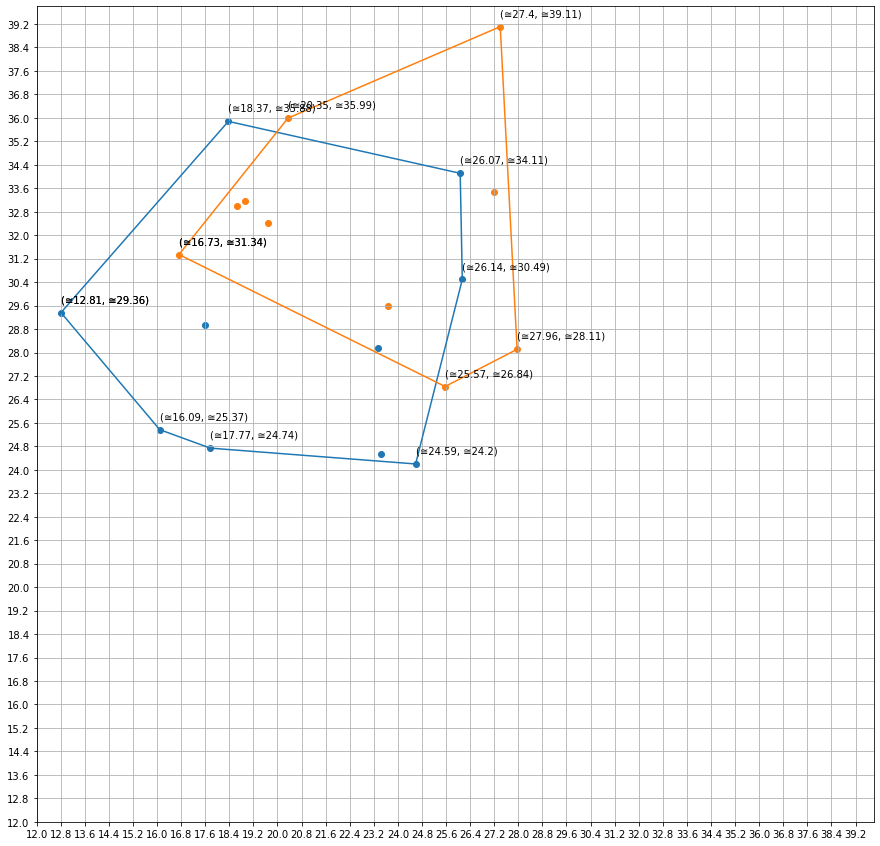

In [ ]:
ClassA = generateListOfPoints(8, (20,30), 10)
ClassB = generateListOfPoints(8, (24,32), 10)

hullA = grahamAlg(ClassA)
hullB = grahamAlg(ClassB)

plotBothHulls(hullA, ClassA, hullB, ClassB)

In [ ]:
separability(hullA, ClassA, hullB, ClassB)

False

####3.1.2) Envoltórias que não se interceptam

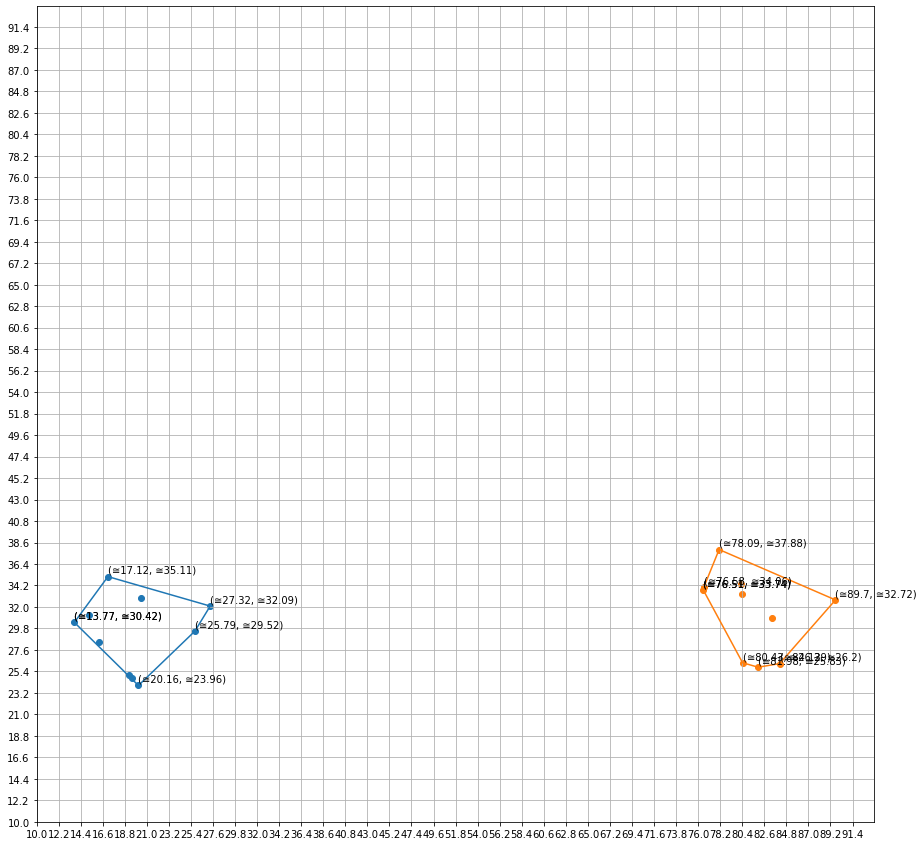

In [ ]:
ClassA = generateListOfPoints(8, (20,30), 10)
ClassB = generateListOfPoints(8, (82,32), 10)

hullA = grahamAlg(ClassA)
hullB = grahamAlg(ClassB)

plotBothHulls(hullA, ClassA, hullB, ClassB)

In [ ]:
ClassA[:5]

[(19.25, 25.04), (20.16, 23.96), (27.32, 32.09), (17.12, 35.11), (15.23, 31.2)]

In [ ]:
separability(hullA, ClassA, hullB, ClassB)

True

##4) Definição da reta modelo

###4.1) Determinando os pontos mais pŕoximos das envoltórias

In [ ]:
def euclidean_distance(p1, p2) -> float:
    """Calcula a distância euclideana entre dois pontos.

    Arguments:
      p1: tuple com as coordenadas x e y nessa ordem.
      p2: tuple com as coordenadas x e y nessa ordem.

    Returns:
      float: o valor da distância
    """
    return np.sqrt((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2)


def closest_pair_of_points_slow(hull_one: list, hull_two: list) -> tuple:
    """Determina o par de pontos de aresta mais próximo de dois conjuntos de pontos.

    Arguments:
      hull_one: list com os pontos
      hull_two: list com os pontos

    Returns:
      tuple: os dois pontos encontrados
    """
    minimum_distance = None
    p1 = None
    p2 = None

    for point_one in hull_one:
        for point_two in hull_two:
            distance = euclidean_distance(point_one, point_two)
            if minimum_distance is None:
                minimum_distance = distance
                p1 = point_one
                p2 = point_two
            elif distance < minimum_distance:
                minimum_distance = distance
                p1 = point_one
                p2 = point_two

    return p1, p2

###4.2) Determinando a reta perpendicular à reta mais próxima no ponto médio

In [ ]:
def median_point(p1: Point, p2: Point) -> Point:
    """Calcula o ponto médio entre dois pontos.

    Arguments:
      p1: Point a ser usado no cálculo
      p2: Point a ser usado no cálculo

    Returns:
      Point: O ponto resultado
    """
    return Point((p1.x + p2.x) / 2, (p1.y + p2.y) / 2)


def perpendicular_line(l: Line, p: Point) -> tuple:
    """Determina a reta perpendicular a uma linha que intercepta em um ponto específico.

    Arguments:
      l: Line a ser comparada no cálculo
      p: Point desejado para inteseção

    Returns:
      LineEquation: equação da linha perpendicular
    """
    try:
        gradient = (l.lhs.y - l.rhs.y) / (l.lhs.x - l.rhs.x)
        offset = l.lhs.y - (gradient * l.lhs.x)
        perpendicular_gradient = -1 * (1 / gradient)
        perpendicular_offset = p.y - (perpendicular_gradient * p.x)
        return LineEquation("y", perpendicular_gradient, perpendicular_offset)
    except ZeroDivisionError:
        y_variation = l.lhs.y - l.rhs.y
        x_variation = l.lhs.x - l.rhs.x

        if x_variation == 0:
            return LineEquation("y", 0, p.y)
        elif y_variation == 0:
            return LineEquation("x", 0, p.x)

###4.3) Exemplo de funcionamento do algoritmo

In [ ]:
p1, p2 = closest_pair_of_points_slow(hullA, hullB)

p1 = Point(p1)
p2 = Point(p2)
p3 = median_point(p1, p2)
eq = perpendicular_line(Line(p1, p2, None), p3)

print(f"Ponto 1: {p1}\nPonto 2: {p2}\nPonto Médio: {p3}\nEquação da linha perpendicular: {eq}")

Ponto 1: (27.32, 32.09)
Ponto 2: (76.51, 33.74)
Ponto Médio: (51.915000000000006, 32.915000000000006)
Equação da linha perpendicular: y=-29.812121212121237x+1580.6112727272741


##5) Classificador

###5.1) Determinando a classe dado um ponto e uma reta qualquer

In [ ]:
def determine_class(eq: LineEquation, p: Point) -> Union[bool, None]:
    """Determina a qual classe o ponto pertence.

    Arguments:
     eq: LineEquation, a equação da linha a ser comparada
     p: Point a ser classificado

    Returns:
     bool | None : True se for de uma classe, False se for de outra, e None se for encima do ponto
    """
    if eq.eixo == "x":
        if p.x == eq.coef_linear:
            return None
        return p.x > eq.coef_linear
    else:
        y_eq = eq.coef_angular * p.x + eq.coef_linear
        if p.y == y_eq:
            return None
        return p.y > y_eq

In [ ]:
determine_class(eq, Point(50,40))

False

##6) Classificação

###6.1) Classe auxiliar para gerenciar os resultados de maneira mais simples

In [ ]:
class ClassificationResult:
    def __init__(
        self,
        is_separable: bool = False,
        line_equation: LineEquation = None,
        precisao: float = None,
        revocacao: float = None,
        f1_escore: float = None,
        custom_reason: str = None,
    ):
        self.is_separable = is_separable
        self.line_equation = line_equation
        self.precisao = precisao
        self.revocacao = revocacao
        self.f1_escore = f1_escore
        self.custom_reason = custom_reason

    def __repr__(self):
        if self.custom_reason is not None:
            return f"Resultado: Falha\nMotivo: {self.custom_reason}"
        elif not self.is_separable:
            return "Resultado: Falha\nMotivo: As envoltórias não são separáveis."
        else:
            return f"Resultado: Sucesso\nEquação da linha: {self.line_equation}\nPrecisão: {self.precisao}\nRevocação: {self.revocacao}\nF1-escore: {self.f1_escore}"

###6.2) Função genérica para treinamento e classificação de quaisquer bases

In [ ]:
# importado la encima
# from sklearn.model_selection import train_test_split
# from sklearn import metrics
# import seaborn as sns

In [ ]:
def classify(
    df: pd.DataFrame, class1: str, class2: str, attributeColumns: Tuple[int, int], classColumn: int
) -> ClassificationResult:
    """Faz a classificação do dataframe usando as primitivas desenvolvidas acima.
       Cria as envoltórias convexas de cada grupo, verifica a separabilidade linear
       e calcula os valores da classificação caso necessário.

    Args:
        df (pd.DataFrame): o DataFrame a ser utilizado no algoritmo
        group_1 (str): o nome da primeira classe a ser comparada
        group_2 (str): o nome da segunda classe a ser comparada
        columns (Tuple[int, int, int]): Uma tupla contendo: (coluna de atributos 1, coluna de atributos 2, coluna de classes)

    Returns:
        ClassificationResult: resultado da classificação
    """
   
    # copia local do dataframe
    DF = df.copy()

    # classes existentes no conjunto
    # ordem de aparição
    #classes = pd.unique(DF[DF.columns[-1]])

    # classes que usaremos para fazer a classificação
    #classes = classes[::len(classes) - 1]
    classes = [class1, class2]

    # removendo do dataframe classes que não serão utilizadas
    DF = DF[DF[classColumn].isin(classes)].copy()

    # transformando nomes de classes em números
    #DF[DF.columns[-1]] = DF[DF.columns[-1]] .map(lambda x: 0 if x == classes[0] else 1 if x == classes[1] else -1)

    # selecionando atributos que vamos usar no classificador
    attributeColumns = list(attributeColumns)
    X = DF[attributeColumns]

    # selecionando coluna de classes
    y = DF[classColumn]

    # separando em conjuntos de treino e de teste
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

    # concatenando conjunto de treino para manipulação nos algoritmos
    trainData = pd.concat([X_train, y_train], axis=1, join='inner')

    # separando instâncias das classes para treino
    whereClassIsA = trainData[classColumn] == classes[0]
    whereClassIsB = trainData[classColumn] == classes[1]

      #removemos a coluna de classe, visto que iremos separar em um df para cada classe
    classA = trainData[whereClassIsA].drop(classColumn, axis=1)
    classB = trainData[whereClassIsB].drop(classColumn, axis=1)

      #transformamos as classes em listas de tuplas para iterar sobre nossos algoritmos
    classA = list(classA.itertuples(index=False, name=None))
    classB = list(classB.itertuples(index=False, name=None))

    # envoltórias de conjunto de treino
    hullA = grahamAlg(classA)
    hullB = grahamAlg(classB)


    # conferindo se dados são separáveis
    isSeparable = separability(hullA, classA, hullB, classB)
    
    if not isSeparable:
      plotBothHulls(hullA, classA, hullB, classB)
      return ClassificationResult(is_separable=False)

    #point p1 is always going to belong to hullA and the opposite for p2
    p1, p2 = closest_pair_of_points_slow(hullA, hullB)



    p1 = Point(p1)
    p2 = Point(p2)

    p3 = median_point(p1, p2)

    # equação da linha para classificação
    line_equation = perpendicular_line(Line(p1, p2, None), p3)

    y1 = 1000*line_equation.coef_angular + line_equation.coef_linear
    y2 = (-1000)*line_equation.coef_angular + line_equation.coef_linear

    # plot do conjunto de treino
    plt.plot((p1.x, p2.x),(p1.y, p2.y))
    plt.plot((1000, -1000), (y1, y2))
    plotBothHulls(hullA, classA, hullB, classB)

    # transformando df de teste em tuplas
    X_test_tuples = list(X_test.itertuples(index=False, name=None))

    # lista com respostas de classificação
    y_pred = []

    # verificando se a classe A está acima da linha
    # se True, a classeA está em cima
    # se False, a classeA está embaixo
    classAPosition = line_equation.determine_point_location(p1)
    classBPosition = line_equation.determine_point_location(p2)

    

    # a cada item do df de teste
    for i in X_test_tuples:
      # caso o ponto analisado esteja no espaço de A, determinamos que seja classificado como A
      if line_equation.determine_point_location(Point(i)) == classAPosition:
        y_pred.append([classes[0]])
      # caso o ponto analisado NÃO esteja no espaço de A, determinamos que seja classificado como B
      elif line_equation.determine_point_location(Point(i)) == classBPosition:
        y_pred.append([classes[1]])
      #else:
      # caso o ponto analisado esteja em cima da reta, definimos a flag -1
        #y_pred.append([-1])

    lixo, y_pred = np.unique(np.array(y_pred), return_inverse=True)
    lixo, y_test = np.unique(y_test.values.reshape(-1,1), return_inverse=True)



    #print(y_pred, "\n", y_test)

    #print(f"Ponto 1: {p1}\nPonto 2: {p2}\nPonto Médio: {p3}\nEquação da linha perpendicular: {line_equation}")
    precisao = metrics.precision_score(y_test, y_pred)
    revocacao = metrics.recall_score(y_test, y_pred)
    f1_escore = metrics.f1_score(y_test, y_pred)

    #print(f"Ponto 1: {p1}\nPonto 2: {p2}\nPonto Médio: {p3}\nEquação da linha perpendicular: {eq}")
      

    return ClassificationResult(
        is_separable=True,
        line_equation = line_equation,
        precisao = precisao,
        revocacao = revocacao,
        f1_escore = f1_escore,
    )


##7) Exemplos com bases de dados reais

###Exemplo 1 - [mammographic](https://sci2s.ugr.es/keel/dataset/data/classification/mammographic-names.txt)

Essa base consiste de dados coletados no Instituto de Radiologia da Universidade de Erlangen-Nuremberg sobre a gravidade de uma lesão de massa mamográfica.

Os dados foram separados em duas classes baseado na gravidade da lesão, tal que dois atributos foram escolhidos, que são a idade da paciente, e a classificação [BI-RADS](https://pt.wikipedia.org/wiki/BI-RADS) do exame.

Os atributos são:

0. Classificação BI-RADS [0,6]
1. Idade [18,96]
2. Forma [1,4]
3. Margem [1,5]
4. Densidade [1,4]
5. Severidade(maligno ou benigno)(Representando as classes) {0, 1}

In [ ]:
a = pd.read_csv(
    "https://sci2s.ugr.es/keel/dataset/data/classification/mammographic.zip",
    header=None,
    engine="python",
    skiprows=10,
)

a.head()

,0,1,2,3,4,5
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1


Ao explorar o dataframe, notamos que os valores usados para os atributos são discretos e em sua grande parte são apresentados em um intervalo pequeno. Por conta disso, dificilmente os dados irão apresentar separação, como iremos observar no pairplot a seguir.

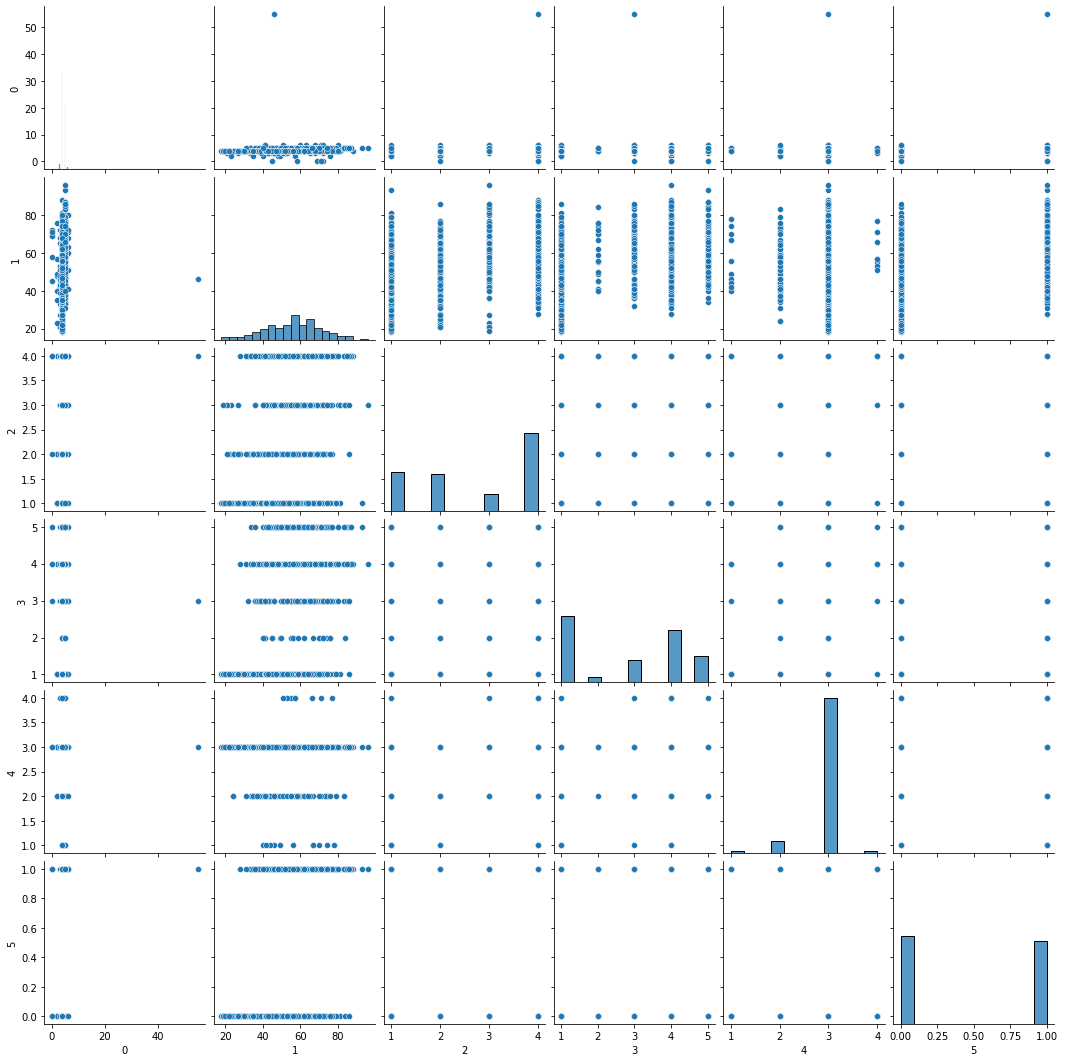

In [ ]:
sns.pairplot(a)

Como é possível ver, os dados apresentam uma dispersão esperada para o contexto citado anteriormente. Portanto, temos que as classes não serão separaveis

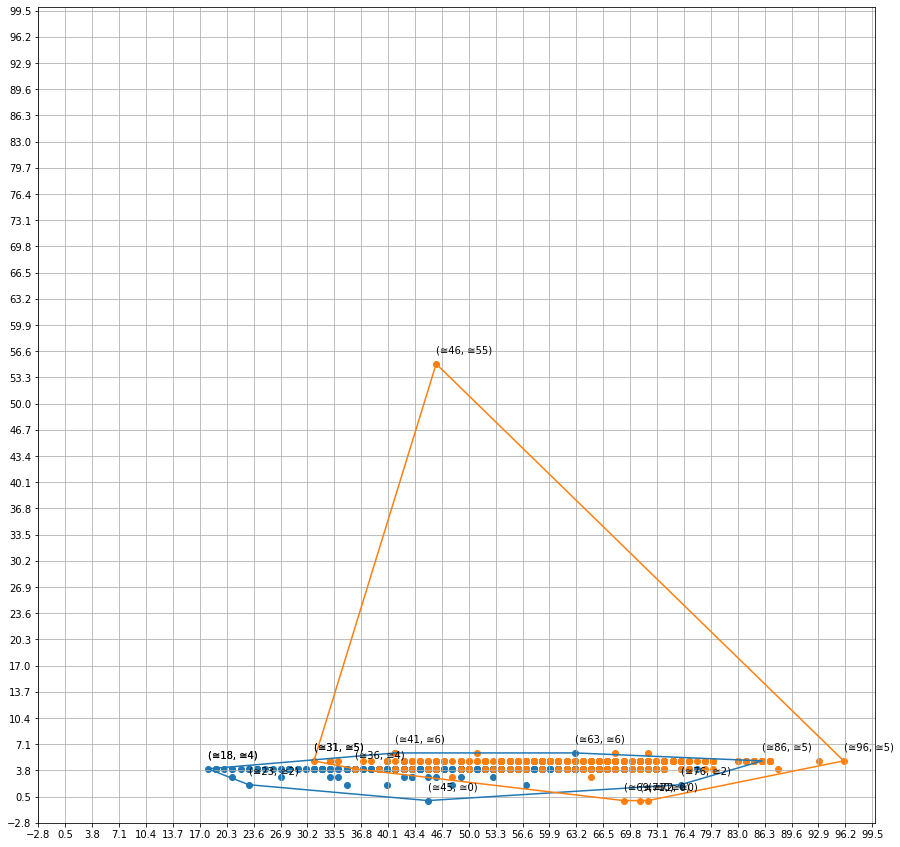

Resultado: Falha
Motivo: As envoltórias não são separáveis.

In [ ]:
classify(df=a, class1=0, class2=1, attributeColumns=(1, 0), classColumn=5)

###Exemplo 2 - [iris](https://sci2s.ugr.es/keel/dataset/data/classification/iris-names.txt)

A seguinte base consiste de dados sobre plantas do gênero íris e é bastante usada como experimento de reconhecimento de padrões.

As classes Iris-setosa e Iris-virginica foram usadas como base para o modelo, e a altura e largura das pétalas são os atributos de interesse.

Os seus atributos são:

0. Comprimento da Sépala [4.3, 7.9]
1. Largura da Sépala [2.0, 4.4]
2. Comprimento da Pétala [1.0, 6.9]
3. Largura da Pétala [0.1, 2.5]
4. Classe (Iris-setosa, Iris-versicolor, Iris-virginica)

In [ ]:
a = pd.read_csv(
    "https://sci2s.ugr.es/keel/dataset/data/classification/iris.zip",
    header=None,
    engine="python",
    skiprows=9,
)
a.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


Exibimos o pairplot para visualizar a distribuição dos dados.

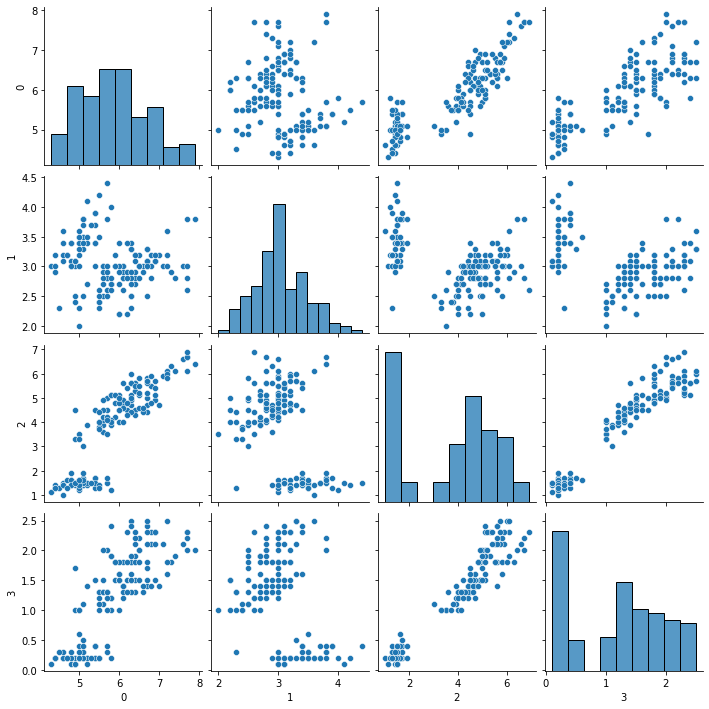

In [ ]:
sns.pairplot(a)

É possível visualizar que existe uma certa separação entre as instâncias de dados apresentados em conjuntos, indicando a possível presença de diferenciação entre as classes.

A fim de testarmos essa ideia, testamos classificar tomando como atributos para separação a Largura da Pétala (atributo 3) e o Comprimento da Pétala (atributo 2). Também vamos tomar como classes a serem classificadas a Iris-setosa e a Iris-versicolor

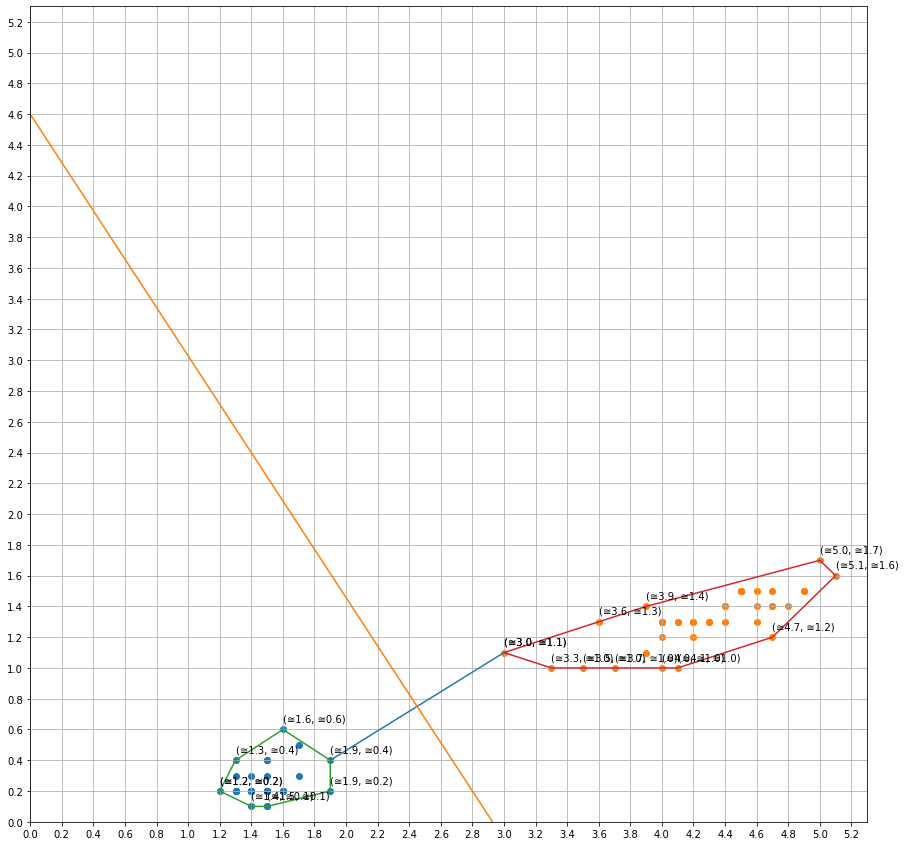

Resultado: Sucesso
Equação da linha: y=-1.5714285714285714x+4.6
Precisão: 1.0
Revocação: 1.0
F1-escore: 1.0

In [ ]:
classify(df=a, class1=" Iris-setosa", class2=" Iris-versicolor", attributeColumns=(2, 3), classColumn=4)

###Exemplo 3 - [phoneme](https://sci2s.ugr.es/keel/dataset/data/classification/phoneme-names.txt)

Essa base de dados consiste em sons fonéticos a fim de distinguir tais sons dentre nasais e orais.

Os atributos existentes são:

0. Fonema Aa (como a vogal em "dark") [-1.7, 4.107]
1. Fonema Ao (como a primeira sílava de "water") [-1.327, 4.378]
2. Fonema Dcl (como a consoante d em "dark") [-1.823, 3.199]
3. Fonema Iy (como a vogal em "she") [-1.581, 2.826]
4. Fonema Sh (como sh em "she") [-1.284, 2.719]
5. Classe (som nasal e som oral) {0, 1}

Os sons escolhidos foram **aa** (como a vogal em dark) e **iy** (como a vogal em she).

Os sons parecem ser bem diferentes na pronúncia nasal e oral, mas como os dados não são linearmente separáveis, vemos um resultado inesperado.


In [ ]:
a = pd.read_csv(
    "https://sci2s.ugr.es/keel/dataset/data/classification/phoneme.zip",
    header=None,
    engine="python",
    skiprows=10,
)

a.head()

,0,1,2,3,4,5
0,1.240,0.875,-0.205,-0.078,0.067,0
1,0.268,1.352,1.035,-0.332,0.217,0
2,1.567,0.867,1.300,1.041,0.559,0
3,0.279,0.990,2.555,-0.738,0.000,0
4,0.307,1.272,2.656,-0.946,-0.467,0


Para melhor visualização da distribuição dos dados, iremos usar um pairplot:

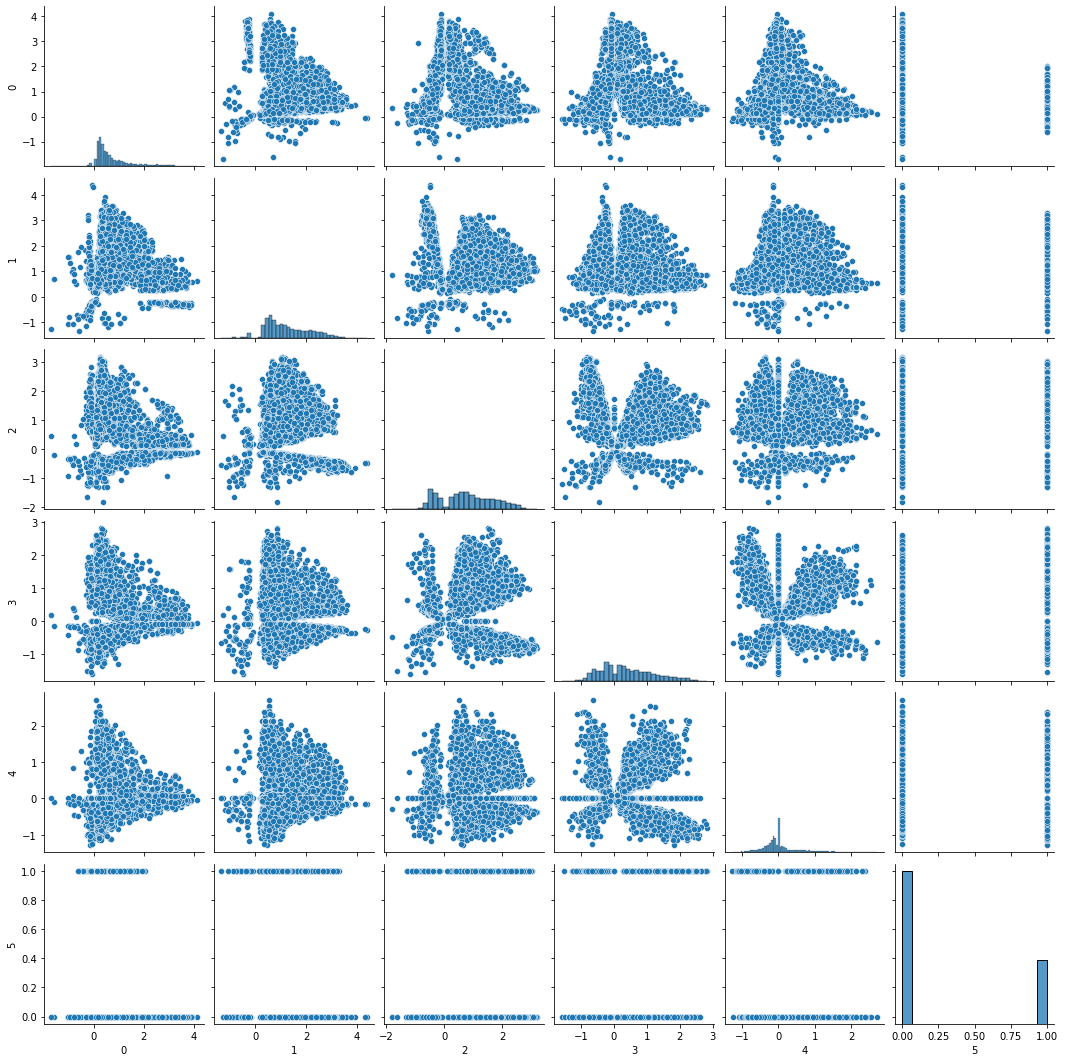

In [ ]:
sns.pairplot(a)

É possível notar que existe uma espécie de distribuição em X em alguns plots, podendo sugerir haver alguma separabilidade em classes das instâncias ali exibidas.

Assim, tomamos os atributos Fonema Iy (atributo 3) e Fonema Sh (atributo 4) a fim de analisarmos melhor a hipótese em nossa classificação

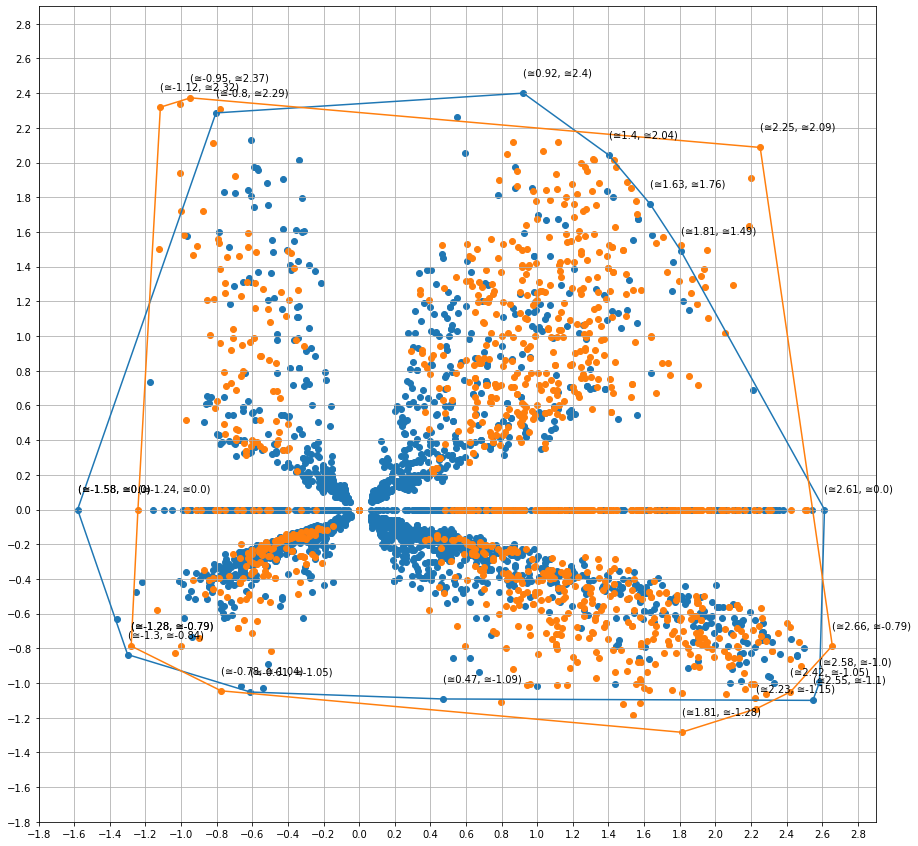

Resultado: Falha
Motivo: As envoltórias não são separáveis.

In [ ]:
classify(df=a, class1=0, class2=1, attributeColumns=(3, 4), classColumn=5)

###Exemplo 4 - [newthyroid](https://sci2s.ugr.es/keel/dataset/data/classification/newthyroid-names.txt)

Essa base contém dados sobre a tireóide de vários pacientes, e são divididos em três classes:
 - normal
 - [hipertieoidismo](https://pt.wikipedia.org/wiki/Hipertiroidismo)
 - [hipotiroidismo](https://pt.wikipedia.org/wiki/Hipotiroidismo)

Além disso, a base contém valores de vários elementos químicos que foram encontrados nos pacientes.

Para a análise, foram escolhidos os pacientes com hipotiroidismo e hipotireoidismo, comparando as quantidades de [TSH](https://pt.wikipedia.org/wiki/Horm%C3%B4nio_estimulante_da_tiroide) e [tiroxina](https://pt.wikipedia.org/wiki/Tiroxina) nos pacientes.

...

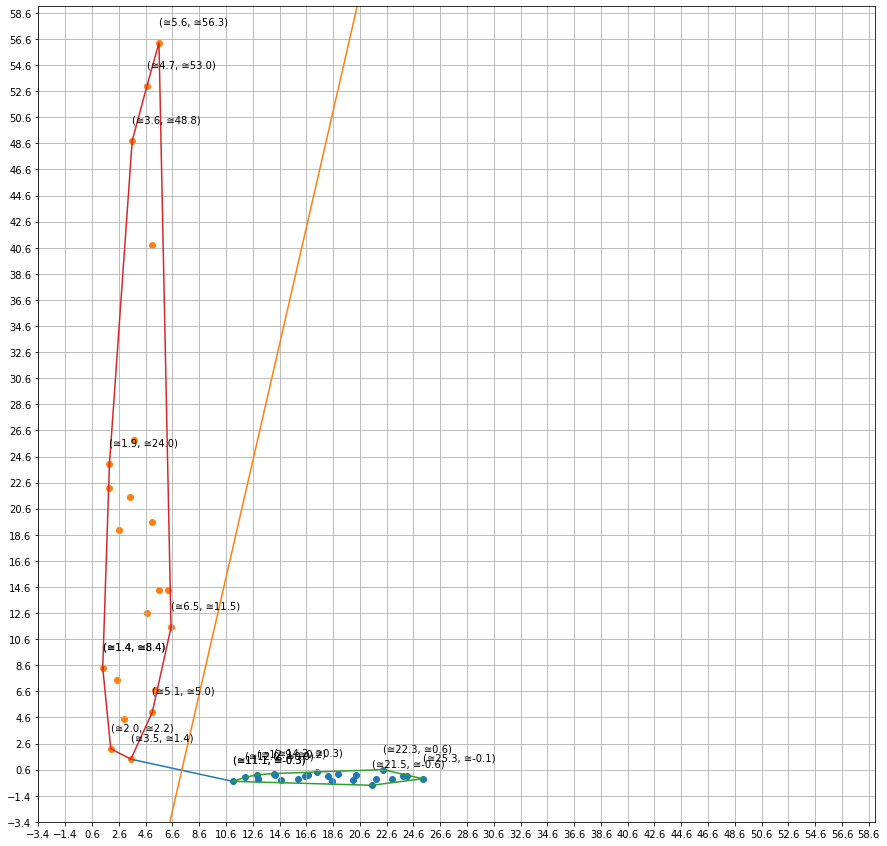

Resultado: Sucesso
Equação da linha: y=4.470588235294118x-32.08529411764706
Precisão: 1.0
Revocação: 1.0
F1-escore: 1.0

In [ ]:
a = pd.read_csv(
    "https://sci2s.ugr.es/keel/dataset/data/classification/newthyroid.zip",
    header=None,
    engine="python",
    skiprows=10,
)

classify(df=a, class1=2, class2=3, attributeColumns=(1, 4), classColumn=5)

###Exemplo 5 - [contraceptive](https://sci2s.ugr.es/keel/dataset/data/classification/contraceptive-names.txt)

Essa base é sobre o uso de métodos contraceptivos em mulheres casadas que não estavam grávidas ou não sabiam se estavem. Os dados são da Pesquisa Nacional de Prevalência de Contraceptivos da Indonésia de 1987.

Como existem várias variáveis categóricas nessa base como o nível de educação da esposa ou a quantidade de filhos, essa é uma oportunidade boa para ver como que o modelo se comporta.

Foram escolhidos dados da classe 1 e 2 de contraceptivos, levando em consideração a idade da esposa e o nível de educação do marido.

Concluimos que o modelo não consegue lidar bem com bases extremamente categóricas.

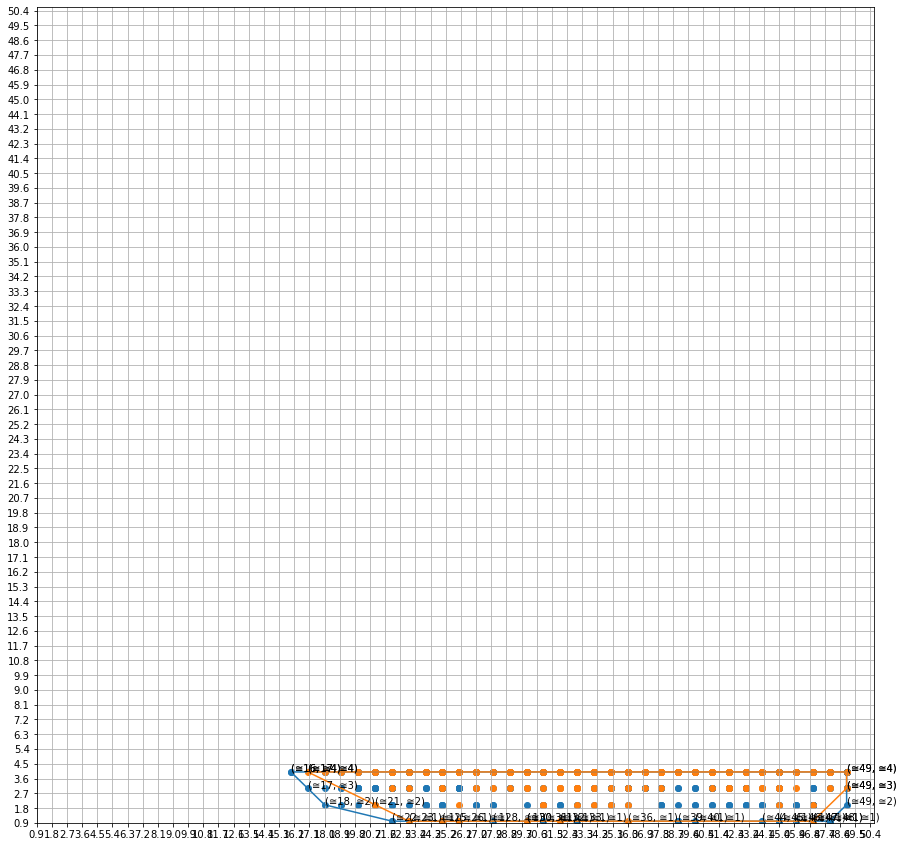

Resultado: Falha
Motivo: As envoltórias não são separáveis.

In [ ]:
a = pd.read_csv(
    "https://sci2s.ugr.es/keel/dataset/data/classification/contraceptive.zip",
    header=None,
    engine="python",
    skiprows=14,
)

classify(df=a, class1=1, class2=2, attributeColumns=(0, 2), classColumn = 9)

###Exemplo 6 - [appendicitis](https://sci2s.ugr.es/keel/dataset/data/classification/appendicitis-names.txt)

Essa base contém os dados de 7 medidores definidos pelos médicos para definir se o paciente tem apendicite ou não.

Para a análise, foram escolhidos os atributos 3 e 4 para comparação. O autor da base não explica o que esses atributos significam, mas podemos ver que eles podem ser relacionados, já que os dados não são linearmente separáveis e uma das classes é contida integralmente dentro da outra neste caso.

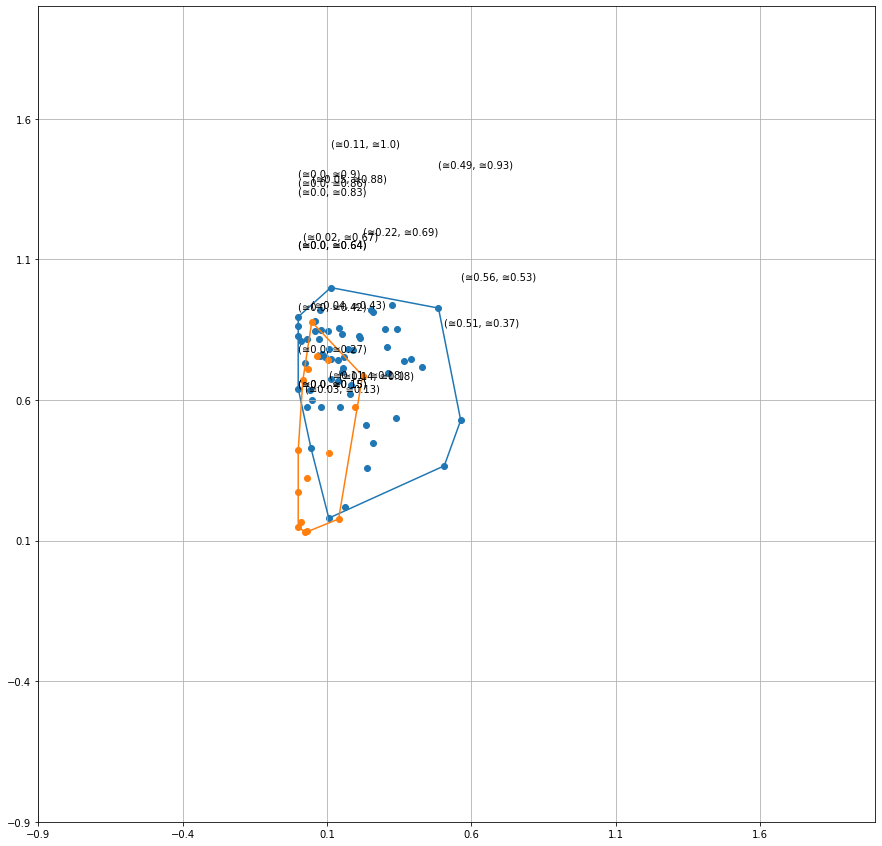

Resultado: Falha
Motivo: As envoltórias não são separáveis.

In [ ]:
a = pd.read_csv(
    "https://sci2s.ugr.es/keel/dataset/data/classification/appendicitis.zip",
    header=None,
    engine="python",
    skiprows=12,
)

classify(df=a, class1=0, class2=1, attributeColumns=(4, 5), classColumn=7)

###Exemplo 7 - [pima](https://sci2s.ugr.es/keel/dataset/data/classification/pima-names.txt)

Essa base consiste de dados sobre os pimas e o estado da diabetes em seus corpos.

Há vários atributos diferentes nessa base em que é possível fazer alguma relação. Foram escolhidos a pressão diastólica do sangue e o índice de massa corporal das pessoas.

Isso nos leva a identificar que os dados não são linearmente separáveis, mas eles também são parcialmente independentes de classe, já que a pressão e o IMC costumam ser parecidos, independente se a pessoa é diabética ou não.

Os atributos são: 

1. Preg = Number of times pregnant 
2. Plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Pres = Diastolic blood pressure (mm Hg) 
4. Skin = Triceps skin fold thickness (mm) 
5. Insu = 2-Hour serum insulin (mu U/ml) 
6. Mass = Body mass index (weight in kg/(height in m)^2) 
7. Pedi = Diabetes pedigree function 
8. Age = Age (years)

In [ ]:
a = pd.read_csv(
    "https://sci2s.ugr.es/keel/dataset/data/classification/pima.zip",
    header=None,
    engine="python",
    skiprows=13,
)
a.head()

,0,1,2,3,4,5,6,7,8
0,14,175,62,30,0,33.6,0.212,38,tested_positive
1,4,146,78,0,0,38.5,0.520,67,tested_positive
2,15,136,70,32,110,37.1,0.153,43,tested_positive
3,3,107,62,13,48,22.9,0.678,23,tested_positive
4,3,169,74,19,125,29.9,0.268,31,tested_positive


Quando visualizamos brevemente os dados, percebemos que algumas observações apresentam atributos com valor igual a 0. Esses valores nulos atribuídos muitas vezes não fazem sentido, uma vez que nas observações acima, é impossível uma pessoa apresentar uma dobra cutânea na região do triceps (atributo 4) igual a zero.

Portanto, vamos alterar esses substituindo-os pela média do atributo.

In [ ]:
#substituindo valores para concentração de glicose no plasma sanguíneo
a[1]=a[1].replace(0,a[1].mean())

#substituindo valores para pressão diastolica
a[2]=a[2].replace(0,a[2].mean())

#substituindo valores para dobra cutanea do triceps
a[3]=a[3].replace(0,a[3].mean())

#substituindo valores para insulina em 2h de soro
a[4]=a[4].replace(0,a[4].mean())

#substituindo valores para indice de massa corpórea
a[5]=a[5].replace(0,a[5].mean())

#substituindo valores para grau de diabetes
a[6]=a[6].replace(0,a[6].mean())

Vamos agora analisar um pairplot a fim de visualizar se existe alguma separação dos dados explícita.

In [ ]:
#sns.pairplot(a)

Vemos que não aparenta existir uma correlação entre os atributos com possíveis classes diferentes existentes, visto que todos os pontos se entrelaçam. Dessa forma, vamos tomar como referência para a classificação um conjunto qualquer de atributos.

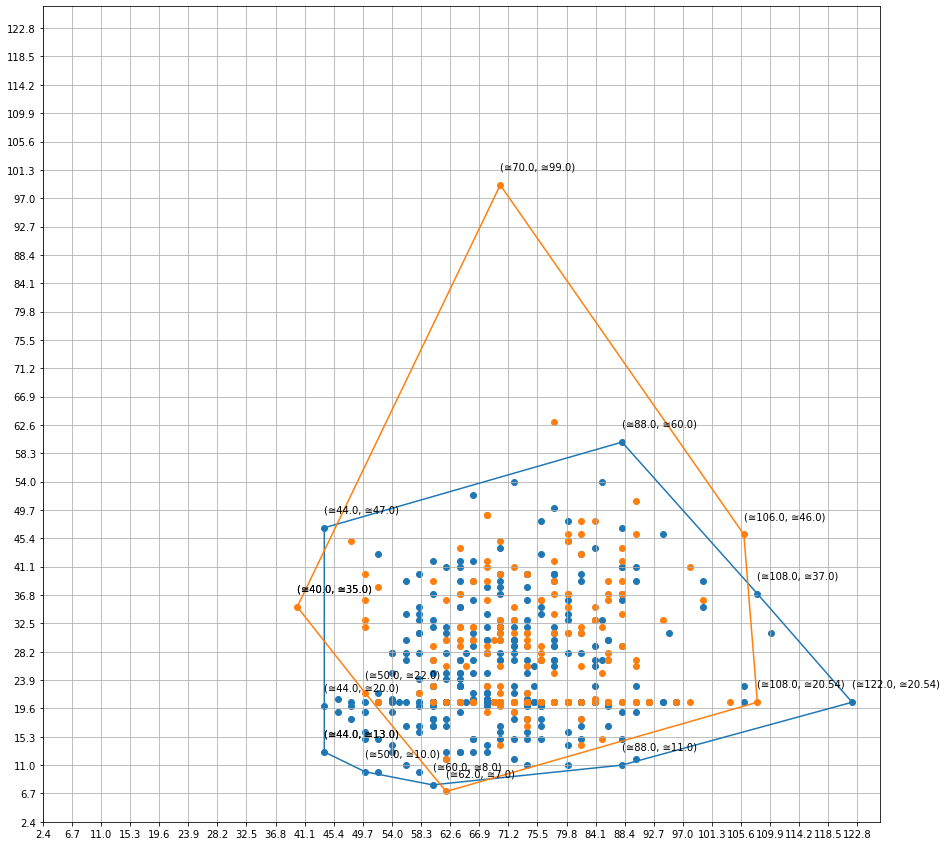

Resultado: Falha
Motivo: As envoltórias não são separáveis.

In [ ]:
classify(df=a, class1="tested_negative", class2="tested_positive", attributeColumns=(2, 3), classColumn=8)

###Exemplo 8 - [saheart](https://sci2s.ugr.es/keel/dataset/data/classification/saheart-names.txt)

A seguinte base possui dados de homens de uma região da África do Sul com alto risco de desenvolvimento de doenças no coração.

Os dados são separados em duas classes: se possuem uma doença cardíaca coronária ou não.

Dentre os atributos, tem vários dados relacionados, como o uso de tabaco, pressão do sangue, obesidade e o consumo de álcool.

Para essa análise, foram levados em consideração a quantidade de [LDL](https://pt.wikipedia.org/wiki/Lipoprote%C3%ADna_de_baixa_densidade) e o nível de obesidade da pessoa.

Como os atributos escolhidos acima são bem relacionados, temos que não há uma separabilidade linear entre as classes. Isso significa que esses atributos não contribuem tanto para o desenvolvimento da doença cardíaca nessa pesquisa.

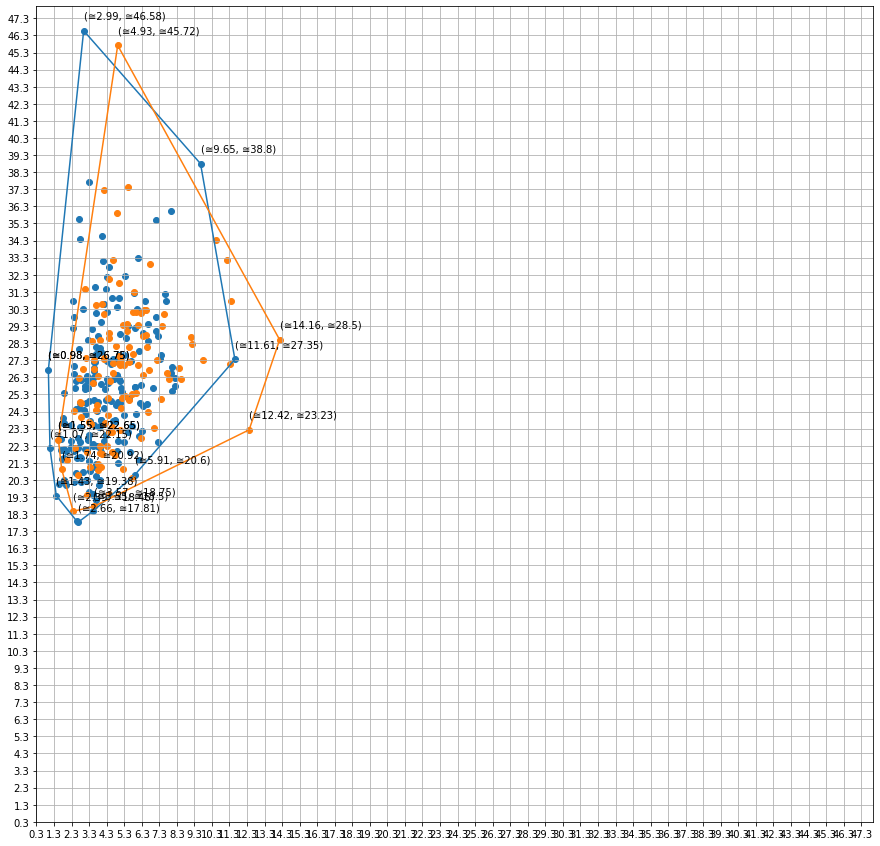

Resultado: Falha
Motivo: As envoltórias não são separáveis.

In [ ]:
a = pd.read_csv(
    "https://sci2s.ugr.es/keel/dataset/data/classification/saheart.zip",
    header=None,
    engine="python",
    skiprows=14,
)

classify(df=a, class1=0, class2=1, attributeColumns=(2, 6), classColumn=9)

###Exemplo 9 - [E.coli](https://sci2s.ugr.es/keel/dataset/data/classification/ecoli-names.txt)

A seguinte base possui dados sobre algumas bactérias E. coli e é utilizado principalmente para problemas onde é necessario realizar a previsão da localização da bacteria.

In [ ]:
a = pd.read_csv(
    "https://sci2s.ugr.es/keel/dataset/data/classification/ecoli.zip",
    header=None,
    engine="python",
    skiprows=12,
)

a.head()

,0,1,2,3,4,5,6,7
0,49.0,29.0,48.0,5.0,56.0,24.0,35.0,cp
1,7.0,4.0,48.0,5.0,54.0,35.0,44.0,cp
2,56.0,4.0,48.0,5.0,49.0,37.0,46.0,cp
3,59.0,49.0,48.0,5.0,52.0,45.0,36.0,cp
4,23.0,32.0,48.0,5.0,55.0,25.0,35.0,cp


Essa base apresenta como atributos:
0. mcg: McGeoch's method for signal sequence recognition.
1. gvh: von Heijne's method for signal sequence recognition.
2. lip: von Heijne's Signal Peptidase II consensus sequence score. Binary attribute.
3. chg: Presence of charge on N-terminus of predicted lipoproteins. Binary attribute.
4. aac: score of discriminant analysis of the amino acid content of outer membrane and periplasmic proteins.
5. alm1: score of the ALOM membrane spanning region prediction program.
6. alm2: score of ALOM program after excluding putative cleavable signal regions from the sequence.
7. Classe (cp: citoplasma, im: inner membrane, pp: periplasm, om: outer membrane, omL: outer membrane lipoprotein, im: inner membrane, imL: inner membrane lipoprotein)


Como feito anteriormente, iremos tomar como referência o resultado de um pairplot dos seus atributos para formar uma hipotese de existência de separabilidade entre classes.

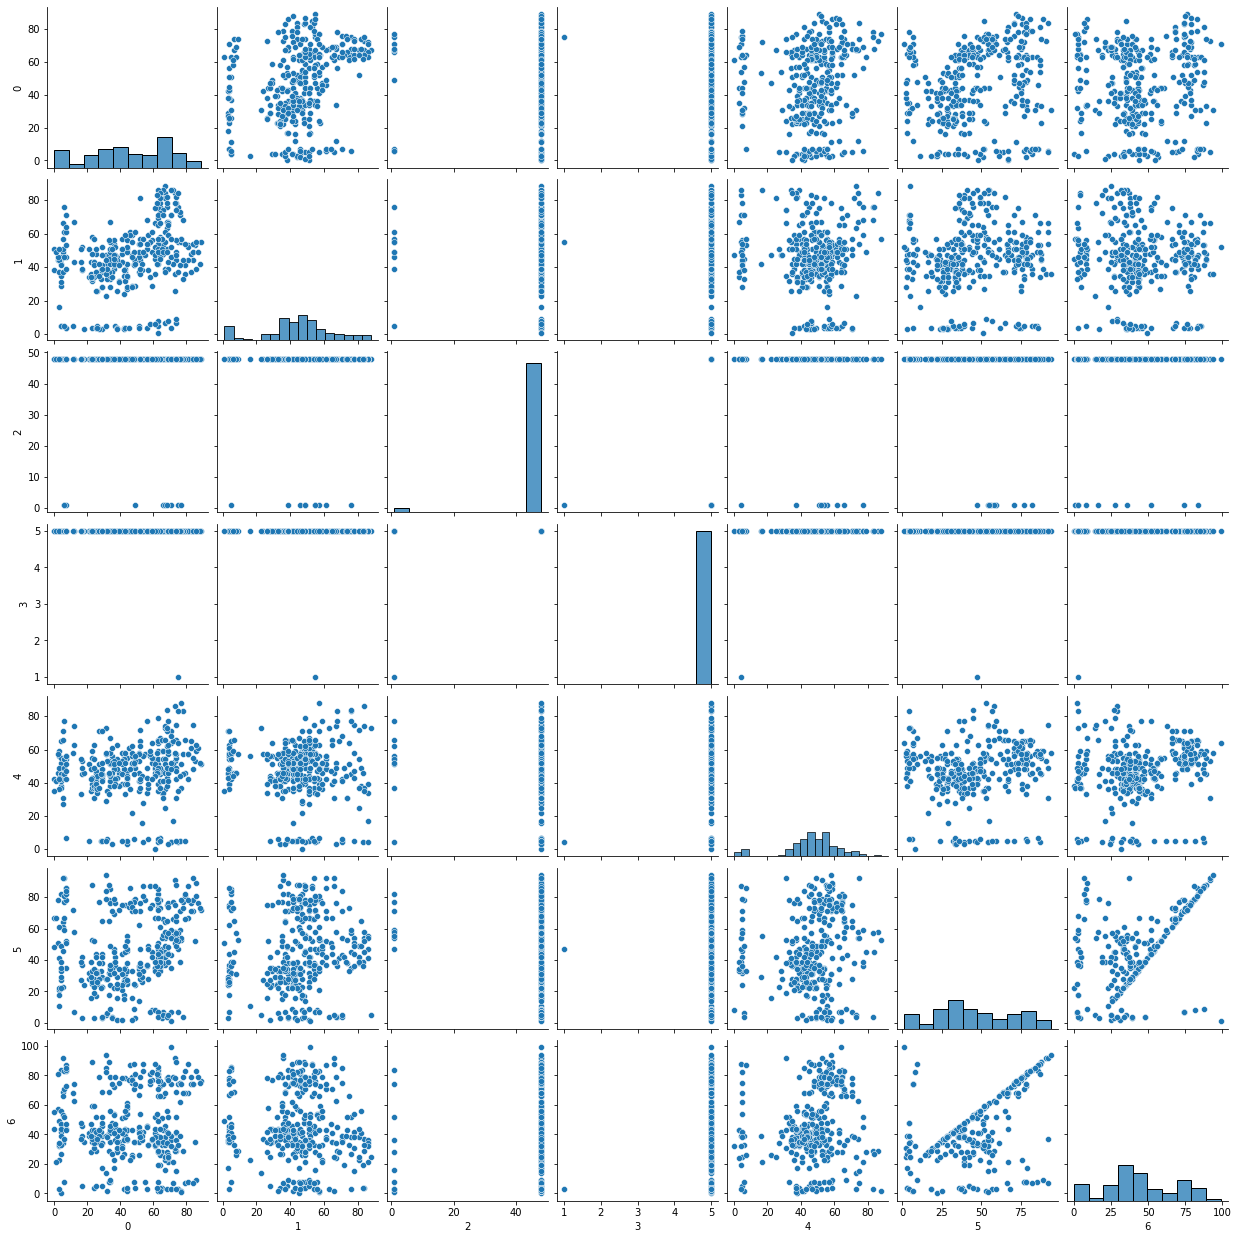

In [ ]:
sns.pairplot(a)

O pairplot apresenta alguns plots que possuem uma concentração de pontos em determinados locais. Após alguns testes realizados com diferentes classes e diferentes atributos selecionados, foi descoberto que utilizando os atributos mcg (atributo 0) e gvh (atributo 1) para as classes cytoplasm (cp) e outer membrane lipoprotein (omL), conseguimos obter uma separabilidade dos dados para algumas das amostras de treino possíveis.

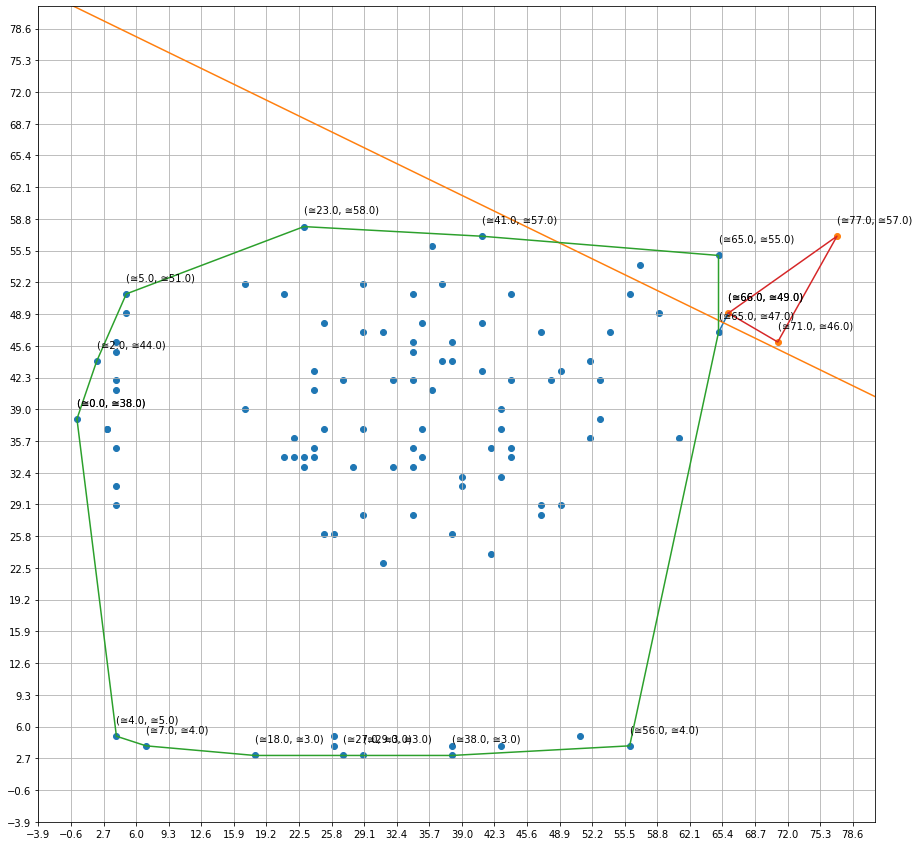

Resultado: Sucesso
Equação da linha: y=-0.5x+80.75
Precisão: 0.5
Revocação: 1.0
F1-escore: 0.6666666666666666

In [ ]:
classify(df=a, class1='cp', class2='omL', attributeColumns=(0, 1), classColumn=7)

###Exemplo 10 - [magic](https://sci2s.ugr.es/keel/dataset/data/classification/magic-names.txt)

A base de dados que iremos utilizar contem dados gerados para simular o registro de particulas gamma de alta energia em um telescopio Cherenkov, isso em nível do mar

In [ ]:
a = pd.read_csv(
    "https://sci2s.ugr.es/keel/dataset/data/classification/magic.zip",
    header=None,
    engine="python",
    skiprows=15,
)

a.head()

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


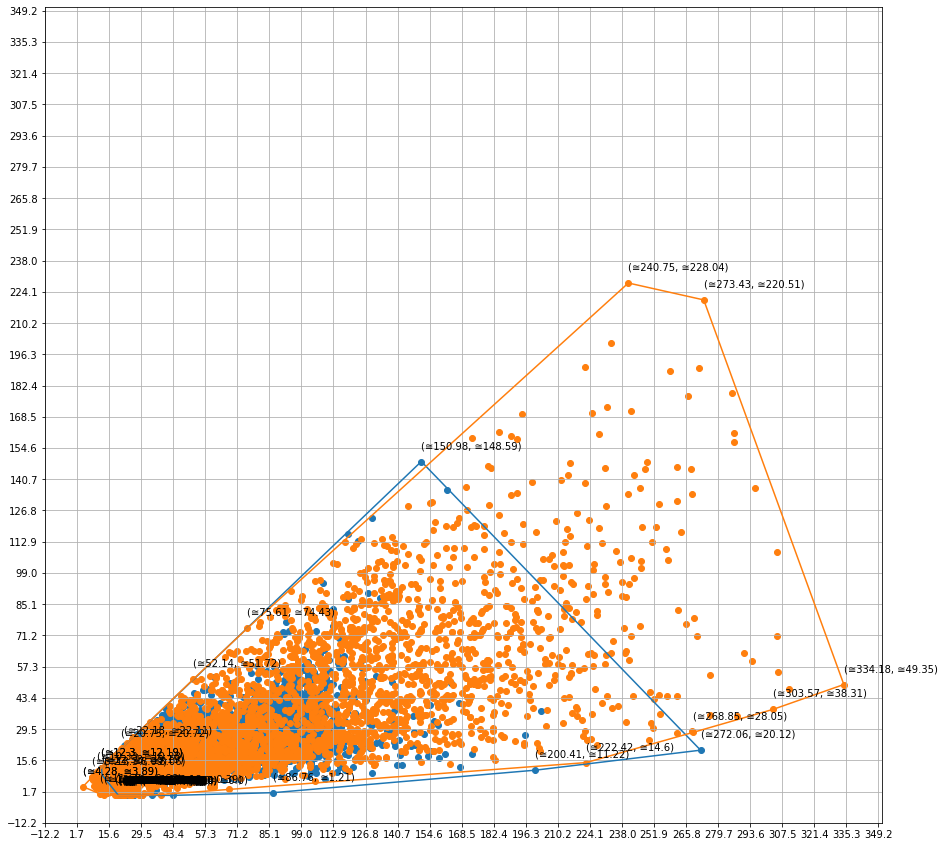

Resultado: Falha
Motivo: As envoltórias não são separáveis.

In [ ]:
classify(df=a, class1='g', class2='h', attributeColumns=(0,1), classColumn=10)